In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
link1 =  '/opt/storage/trusted/aesop/visualization/Mobility/aero_anac_2007_2023.parquet'

#/Users/julianeoliveira/Documents/Projects/AESOP/AESOP datalake/Mobility - Road-air-fluvial networks/air/ANAC/aero_anac.parquet'

df = pd.read_parquet(link1, engine='pyarrow')

In [3]:
df

ano mes            nat nome_muni_ori uf_ori  \
0       2007   1      DOMÉSTICA      Almeirim     PA   
1       2007   1      DOMÉSTICA      Almeirim     PA   
2       2007   1      DOMÉSTICA      Almeirim     PA   
3       2007   1      DOMÉSTICA      Almeirim     PA   
4       2007   1      DOMÉSTICA      Almeirim     PA   
...      ...  ..            ...           ...    ...   
277379  2023   4  INTERNACIONAL     VENEZUELA          
277380  2023   4  INTERNACIONAL     VENEZUELA          
277381  2023   4  INTERNACIONAL     VENEZUELA          
277382  2023   4  INTERNACIONAL     VENEZUELA          
277383  2023   4  INTERNACIONAL     VENEZUELA          

                    nome_muni_des uf_des co_muni_ori  \
0                        Altamira     PA     1500503   
1                           Belém     PA     1500503   
2                          Macapá     AP     1500503   
3                       Oriximiná     PA     1500503   
4                        Santarém     PA     1500503   
...                           ...    ...         ...   
277379                    EQUADOR          VENEZUELA   
277380  ESTADOS UNIDOS DA AMÉRICA          VENEZUELA   
277381                     Manaus     AM   VENEZUELA   
277382               Porto Alegre     RS   VENEZUELA   
277383                  São Paulo     SP   VENEZUELA   

                      co_muni_des  aero_pass co_uf_ori co_uf_des  \
0                         1500602         38        15        15   
1                         1501402        705        15        15   
2                         1600303          0        15        15   
3                         1505304          0        15        15   
4                         1506807          3        15        15   
...                           ...        ...       ...       ...   
277379                    EQUADOR          0                       
277380  ESTADOS UNIDOS DA AMÉRICA          0                       
277381                    1302603        166                       
277382                    4314902          0                       
277383                    3550308         46                       

        aero_pass_week  aero_conec  
0                 9.50    0.079167  
1               176.25    1.468750  
2                 0.00    0.000000  
3                 0.00    0.000000  
4                 0.75    0.006250  
...                ...         ...  
277379            0.00    0.000000  
277380            0.00    0.000000  
277381           41.50    0.345833  
277382            0.00    0.000000  
277383           11.50    0.095833  

[277384 rows x 14 columns]

In [4]:
df[df.uf_ori == 'AL'].nome_muni_ori.unique()

array(['Rio Largo'], dtype=object)

In [5]:
df[df.uf_des == 'AL'].nome_muni_des.unique()

array(['Rio Largo'], dtype=object)

In [6]:
df.mes = df.mes.astype(int)

# Select domestic flights

In [7]:
df.nat.unique()

array(['DOMÉSTICA', 'INTERNACIONAL'], dtype=object)

In [8]:
dta = df[df.nat == 'DOMÉSTICA']
dta.head()

ano  mes        nat nome_muni_ori uf_ori nome_muni_des uf_des co_muni_ori  \
0  2007    1  DOMÉSTICA      Almeirim     PA      Altamira     PA     1500503   
1  2007    1  DOMÉSTICA      Almeirim     PA         Belém     PA     1500503   
2  2007    1  DOMÉSTICA      Almeirim     PA        Macapá     AP     1500503   
3  2007    1  DOMÉSTICA      Almeirim     PA     Oriximiná     PA     1500503   
4  2007    1  DOMÉSTICA      Almeirim     PA      Santarém     PA     1500503   

  co_muni_des  aero_pass co_uf_ori co_uf_des  aero_pass_week  aero_conec  
0     1500602         38        15        15            9.50    0.079167  
1     1501402        705        15        15          176.25    1.468750  
2     1600303          0        15        15            0.00    0.000000  
3     1505304          0        15        15            0.00    0.000000  
4     1506807          3        15        15            0.75    0.006250

In [9]:
dta = dta[dta.ano >= '2017']

In [10]:
num_airport = dta.groupby(['ano','uf_ori'])['nome_muni_ori'].nunique().reset_index()

In [11]:
num_airport[num_airport.ano == '2017'].head()

ano uf_ori  nome_muni_ori
0  2017     AC              2
1  2017     AL              1
2  2017     AM             14
3  2017     AP              2
4  2017     BA             16

In [12]:
fig1 = num_airport.rename(columns={"ano": "Year", "uf_ori":'Federative Units', 
                                   'nome_muni_ori': 'Number of Cities with Active Airports' })

In [13]:
fig1.head()

Year Federative Units  Number of Cities with Active Airports
0  2017               AC                                      2
1  2017               AL                                      1
2  2017               AM                                     14
3  2017               AP                                      2
4  2017               BA                                     16

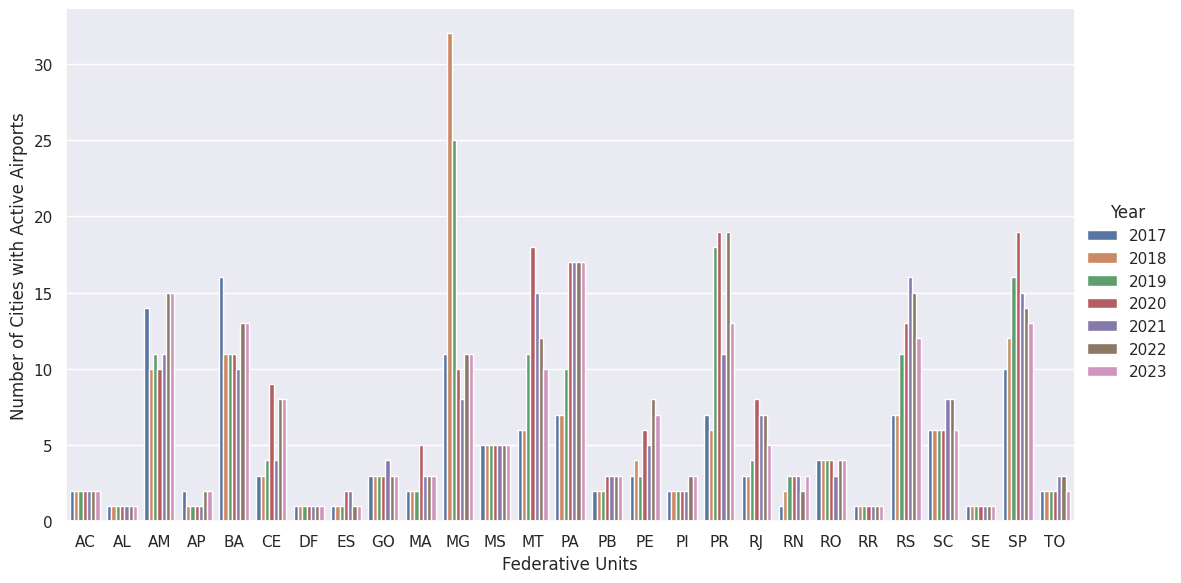

In [76]:
sns.set(font_scale=1)
sns.catplot(data=fig1, x="Federative Units", y="Number of Cities with Active Airports", hue="Year", 
            kind="bar",height=6, aspect=11/6)
sns.set_style( {'grid.linestyle': '--'})
#sns.countplot(x = x)

plt.savefig("/home/juliane.oliveira/workspace/Reproducibility-results_paper2/scripts/Figures/SupFig1.png")

In [ ]:
'On average, Brazil has 159 municipalities across the country with operational airports, serving both public \n
and private transportation needs. The majority of states has less than 5 municipalities with active airport \n
oparating during the period, with exception of Amazon and Pará in the north, Bahia in the northeast, Minas \n
Gerais and Mato Grosso in the center, São Paulo in the southest, and Paraná and Rio Grande do Sul, which  \n
account with more than 10 municipalities with active airports. In particular, there is a noticeable upward \n
trend in the number of municipalities with active flights from 2019 to 2023, despite the increase in number \n
of passengers in the pandemic period. Minas Gerais, the Brazilian state with biggest number of municipalities \n
(853), reached in 2018 and 2019 more than 25 municipalities with active airports.' 

In [60]:
25*100/853

2.9308323563892147

In [58]:
fig1.groupby(['Year'])['Number of Cities with Active Airports'].sum().reset_index()['Number of Cities with Active Airports'].mean()

158.85714285714286

In [17]:
for year in ['2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'AM')].nome_muni_ori.unique())

['Barcelos' 'Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé' 'Parintins' 'Borba' 'Maués'
 'Boca do Acre' 'Humaitá']
['Barcelos' 'Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé']
['Barcelos' 'Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé' 'Maués']
['Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Maués' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé']
['Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Maués' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé' 'Manicoré']
['Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Maués' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé' 'Barcelos' 'Apuí' 'Borba'
 'Manicoré' 'Santa Isabel do Rio Negro']
['Apuí' 'Barcelos' 'Borba' 'Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus'
 'Manicoré' 'Maués' 'Parintins' 'Santa Isabel do Rio Negro'
 'São Gabriel da Cachoeira'

In [18]:
for year in ['2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'PA')].nome_muni_ori.unique())

['Altamira' 'Belém' 'Itaituba' 'Marabá' 'Oriximiná' 'Parauapebas'
 'Santarém']
['Altamira' 'Belém' 'Itaituba' 'Marabá' 'Oriximiná' 'Parauapebas'
 'Santarém']
['Altamira' 'Belém' 'Itaituba' 'Marabá' 'Oriximiná' 'Parauapebas'
 'Santarém' 'Almeirim' 'Breves' 'Porto de Moz']
['Almeirim' 'Altamira' 'Belém' 'Breves' 'Itaituba' 'Marabá' 'Oriximiná'
 'Parauapebas' 'Porto de Moz' 'Santarém' 'Monte Alegre' 'Óbidos' 'Tucuruí'
 'Alenquer' 'Chaves' 'Redenção' 'Paragominas']
['Almeirim' 'Altamira' 'Belém' 'Breves' 'Itaituba' 'Marabá' 'Monte Alegre'
 'Oriximiná' 'Parauapebas' 'Porto de Moz' 'Santarém' 'Óbidos' 'Chaves'
 'Brejo' 'Paragominas' 'Tucuruí' 'Alenquer']
['Almeirim' 'Altamira' 'Belém' 'Brejo' 'Breves' 'Chaves' 'Itaituba'
 'Marabá' 'Monte Alegre' 'Oriximiná' 'Paragominas' 'Parauapebas'
 'Santarém' 'Tucuruí' 'Óbidos' 'Porto de Moz' 'Salinópolis']
['Almeirim' 'Altamira' 'Belém' 'Breves' 'Itaituba' 'Marabá' 'Monte Alegre'
 'Oriximiná' 'Paragominas' 'Parauapebas' 'Porto de Moz' 'Salinópolis'
 'Sa

In [19]:
for year in ['2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'MT')].nome_muni_ori.unique())

['Alta Floresta' 'Barra do Garças' 'Rondonópolis' 'Sinop' 'Sorriso'
 'Várzea Grande']
['Alta Floresta' 'Barra do Garças' 'Rondonópolis' 'Sinop' 'Sorriso'
 'Várzea Grande']
['Alta Floresta' 'Barra do Garças' 'Rondonópolis' 'Sinop' 'Sorriso'
 'Várzea Grande' 'Juína' 'São Félix do Araguaia' 'Tangará da Serra'
 'Água Boa' 'Aripuanã']
['Alta Floresta' 'Aripuanã' 'Barra do Garças' 'Canarana' 'Juara' 'Juína'
 'Nova Mutum' 'Pontes e Lacerda' 'Primavera do Leste' 'Rondonópolis'
 'Sinop' 'Sorriso' 'São Félix do Araguaia' 'Tangará da Serra'
 'Várzea Grande' 'Água Boa' 'Confresa' 'Lucas do Rio Verde']
['Alta Floresta' 'Aripuanã' 'Barra do Garças' 'Confresa' 'Juína'
 'Lucas do Rio Verde' 'Nova Mutum' 'Rondonópolis' 'Sinop' 'Sorriso'
 'São Félix do Araguaia' 'Tangará da Serra' 'Várzea Grande' 'Água Boa'
 'Porto Alegre do Norte']
['Alta Floresta' 'Aripuanã' 'Barra do Garças' 'Juína' 'Rondonópolis'
 'Sinop' 'Sorriso' 'São Félix do Araguaia' 'Tangará da Serra'
 'Várzea Grande' 'Água Boa' 'Porto Alegre 

In [17]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'RR')].nome_muni_ori.unique())

['Boa Vista']
['Boa Vista']
['Boa Vista']
['Boa Vista']
['Boa Vista']
['Boa Vista']
['Boa Vista']
['Boa Vista']


In [18]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'RJ')].nome_muni_ori.unique())

['Cabo Frio' 'Campos dos Goytacazes' 'Rio de Janeiro']
['Cabo Frio' 'Campos dos Goytacazes' 'Rio de Janeiro']
['Cabo Frio' 'Campos dos Goytacazes' 'Rio de Janeiro']
['Cabo Frio' 'Campos dos Goytacazes' 'Rio de Janeiro' 'Macaé']
['Cabo Frio' 'Campos dos Goytacazes' 'Macaé' 'Rio de Janeiro'
 'Angra dos Reis' 'Maricá' 'Paraty' 'Mangaratiba']
['Angra dos Reis' 'Cabo Frio' 'Campos dos Goytacazes' 'Macaé' 'Paraty'
 'Rio de Janeiro' 'Maricá']
['Cabo Frio' 'Campos dos Goytacazes' 'Macaé' 'Rio de Janeiro'
 'Armação dos Búzios' 'Maricá' 'Paraty']
['Cabo Frio' 'Campos dos Goytacazes' 'Macaé' 'Rio de Janeiro'
 'Angra dos Reis']


In [19]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'SE')].nome_muni_ori.unique())

['Aracaju']
['Aracaju']
['Aracaju']
['Aracaju']
['Aracaju']
['Aracaju']
['Aracaju']
['Aracaju']


In [20]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'TO')].nome_muni_ori.unique())

['Araguaína' 'Palmas']
['Araguaína' 'Palmas']
['Araguaína' 'Palmas']
['Araguaína' 'Palmas']
['Araguaína' 'Palmas']
['Araguaína' 'Palmas' 'Gurupi']
['Araguaína' 'Palmas' 'Gurupi']
['Araguaína' 'Palmas']


In [21]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'SP')].nome_muni_ori.unique())

['Araçatuba' 'Arealva' 'Campinas' 'Marília' 'Presidente Prudente'
 'Ribeirão Preto' 'São Carlos' 'São José do Rio Preto'
 'São José dos Campos' 'São Paulo' 'Araraquara' 'Gavião Peixoto']
['Araçatuba' 'Arealva' 'Campinas' 'Marília' 'Presidente Prudente'
 'Ribeirão Preto' 'São Carlos' 'São José do Rio Preto'
 'São José dos Campos' 'São Paulo']
['Araçatuba' 'Arealva' 'Campinas' 'Marília' 'Presidente Prudente'
 'Ribeirão Preto' 'São Carlos' 'São José do Rio Preto'
 'São José dos Campos' 'São Paulo' 'Gavião Peixoto' 'Barretos']
['Araçatuba' 'Arealva' 'Campinas' 'Marília' 'Presidente Prudente'
 'Ribeirão Preto' 'São Carlos' 'São José do Rio Preto'
 'São José dos Campos' 'São Paulo' 'Barretos' 'Franca' 'Guaíra' 'Jundiaí'
 'Gavião Peixoto' 'Araraquara']
['Araraquara' 'Araçatuba' 'Arealva' 'Barretos' 'Campinas' 'Franca'
 'Guaíra' 'Marília' 'Presidente Prudente' 'Ribeirão Preto' 'São Carlos'
 'São José do Rio Preto' 'São José dos Campos' 'São Paulo' 'Bauru'
 'Jundiaí' 'Sorocaba' 'Itanhaém' 'Ubat

In [22]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'MG')].nome_muni_ori.unique())

['Araxá' 'Belo Horizonte' 'Divinópolis' 'Goianá' 'Governador Valadares'
 'Montes Claros' 'Patos de Minas' 'Santana do Paraíso' 'Uberaba'
 'Uberlândia' 'Varginha' 'Juiz de Fora' 'Poços de Caldas']
['Araxá' 'Belo Horizonte' 'Divinópolis' 'Goianá' 'Governador Valadares'
 'Montes Claros' 'Santana do Paraíso' 'Uberaba' 'Uberlândia' 'Varginha'
 'Patos de Minas']
['Araxá' 'Belo Horizonte' 'Divinópolis' 'Goianá' 'Governador Valadares'
 'Montes Claros' 'Santana do Paraíso' 'Uberaba' 'Uberlândia' 'Varginha'
 'Almenara' 'Araçuaí' 'Diamantina' 'Guaxupé' 'Manhuaçu' 'Paracatu'
 'Passos' 'Patos de Minas' 'Patrocínio' 'Piumhi' 'Pouso Alegre'
 'Poços de Caldas' 'Teófilo Otoni' 'Ubaporanga' 'Viçosa' 'Caxambu'
 'Nanuque' 'Alfenas' 'Formiga' 'São João del Rei' 'Campo Florido'
 'São Sebastião do Paraíso']
['Almenara' 'Araxá' 'Araçuaí' 'Belo Horizonte' 'Diamantina' 'Goianá'
 'Governador Valadares' 'Manhuaçu' 'Montes Claros' 'Passos'
 'Patos de Minas' 'Patrocínio' 'Piumhi' 'Pouso Alegre' 'Poços de Caldas'
 '

In [23]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'MA')].nome_muni_ori.unique())

['Imperatriz' 'São Luís']
['Imperatriz' 'São Luís']
['Imperatriz' 'São Luís']
['Imperatriz' 'São Luís']
['Imperatriz' 'São Luís' 'Brejo' 'Codó' 'Pedreiras']
['Brejo' 'Imperatriz' 'São Luís']
['Imperatriz' 'São Luís' 'Barreirinhas']
['Barreirinhas' 'Imperatriz' 'São Luís']


In [24]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'AM')].nome_muni_ori.unique())

['Barcelos' 'Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé' 'Atalaia do Norte']
['Barcelos' 'Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé' 'Parintins' 'Borba' 'Maués'
 'Boca do Acre' 'Humaitá']
['Barcelos' 'Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé']
['Barcelos' 'Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé' 'Maués']
['Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Maués' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé']
['Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Maués' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé' 'Manicoré']
['Carauari' 'Coari' 'Eirunepé' 'Lábrea' 'Manaus' 'Maués' 'Parintins'
 'São Gabriel da Cachoeira' 'Tabatinga' 'Tefé' 'Barcelos' 'Apuí' 'Borba'
 'Manicoré' 'Santa Isabel do Rio Negro']
['Apuí' 'Barcelos' 'Bor

In [25]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'BA')].nome_muni_ori.unique())

['Barreiras' 'Feira de Santana' 'Ilhéus' 'Lençóis' 'Paulo Afonso'
 'Porto Seguro' 'Salvador' 'Teixeira de Freitas' 'Una' 'Valença'
 'Vitória da Conquista' 'Juazeiro' 'Guanambi' 'Uauá' 'Ipiaú' 'Irecê']
['Barreiras' 'Feira de Santana' 'Ilhéus' 'Lençóis' 'Paulo Afonso'
 'Porto Seguro' 'Salvador' 'Teixeira de Freitas' 'Una' 'Valença'
 'Vitória da Conquista' 'Guanambi' 'Luís Eduardo Magalhães' 'Irecê'
 'Itapetinga' 'Juazeiro']
['Barreiras' 'Feira de Santana' 'Ilhéus' 'Lençóis' 'Paulo Afonso'
 'Porto Seguro' 'Salvador' 'Teixeira de Freitas' 'Una' 'Valença'
 'Vitória da Conquista']
['Barreiras' 'Feira de Santana' 'Ilhéus' 'Lençóis' 'Paulo Afonso'
 'Porto Seguro' 'Salvador' 'Teixeira de Freitas' 'Una' 'Valença'
 'Vitória da Conquista']
['Barreiras' 'Feira de Santana' 'Ilhéus' 'Lençóis' 'Paulo Afonso'
 'Porto Seguro' 'Salvador' 'Teixeira de Freitas' 'Una' 'Valença'
 'Vitória da Conquista']
['Barreiras' 'Ilhéus' 'Porto Seguro' 'Salvador' 'Teixeira de Freitas'
 'Una' 'Vitória da Conquista' 'Guana

In [26]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'MS')].nome_muni_ori.unique())

['Bonito' 'Campo Grande' 'Corumbá' 'Dourados' 'Três Lagoas']
['Bonito' 'Campo Grande' 'Corumbá' 'Dourados' 'Três Lagoas']
['Bonito' 'Campo Grande' 'Corumbá' 'Dourados' 'Três Lagoas']
['Bonito' 'Campo Grande' 'Corumbá' 'Dourados' 'Três Lagoas']
['Bonito' 'Campo Grande' 'Corumbá' 'Dourados' 'Três Lagoas']
['Bonito' 'Campo Grande' 'Corumbá' 'Dourados' 'Três Lagoas']
['Bonito' 'Campo Grande' 'Corumbá' 'Ponta Porã' 'Três Lagoas']
['Bonito' 'Campo Grande' 'Corumbá' 'Ponta Porã' 'Três Lagoas']


In [27]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'DF')].nome_muni_ori.unique())

['Brasília']
['Brasília']
['Brasília']
['Brasília']
['Brasília']
['Brasília']
['Brasília']
['Brasília']


In [28]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'GO')].nome_muni_ori.unique())

['Caldas Novas' 'Goiânia' 'Rio Verde']
['Caldas Novas' 'Goiânia' 'Rio Verde']
['Caldas Novas' 'Goiânia' 'Rio Verde']
['Caldas Novas' 'Goiânia' 'Rio Verde']
['Caldas Novas' 'Goiânia' 'Rio Verde']
['Caldas Novas' 'Goiânia' 'Rio Verde' 'Anápolis']
['Caldas Novas' 'Goiânia' 'Rio Verde']
['Caldas Novas' 'Goiânia' 'Rio Verde']


In [29]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'PB')].nome_muni_ori.unique())

['Campina Grande' 'Santa Rita']
['Campina Grande' 'Santa Rita']
['Campina Grande' 'Santa Rita']
['Campina Grande' 'Santa Rita']
['Campina Grande' 'Santa Rita' 'Patos']
['Campina Grande' 'Santa Rita' 'Patos']
['Campina Grande' 'Patos' 'Santa Rita']
['Campina Grande' 'Patos' 'Santa Rita']


In [30]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'PE')].nome_muni_ori.unique())

['Fernando de Noronha' 'Petrolina' 'Recife']
['Fernando de Noronha' 'Petrolina' 'Recife']
['Fernando de Noronha' 'Petrolina' 'Recife' 'Serra Talhada']
['Fernando de Noronha' 'Petrolina' 'Recife']
['Fernando de Noronha' 'Petrolina' 'Recife' 'Caruaru' 'Serra Talhada'
 'Salgueiro']
['Caruaru' 'Fernando de Noronha' 'Petrolina' 'Recife' 'Serra Talhada']
['Caruaru' 'Fernando de Noronha' 'Petrolina' 'Recife' 'Serra Talhada'
 'Araripina' 'Garanhuns' 'Igarassu']
['Araripina' 'Caruaru' 'Fernando de Noronha' 'Garanhuns' 'Petrolina'
 'Recife' 'Serra Talhada']


In [31]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'PR')].nome_muni_ori.unique())

['Cascavel' 'Foz do Iguaçu' 'Londrina' 'Maringá' 'São José dos Pinhais'
 'Ponta Grossa' 'Telêmaco Borba']
['Cascavel' 'Foz do Iguaçu' 'Londrina' 'Maringá' 'Ponta Grossa'
 'São José dos Pinhais' 'Telêmaco Borba']
['Cascavel' 'Foz do Iguaçu' 'Londrina' 'Maringá' 'Ponta Grossa'
 'São José dos Pinhais']
['Cascavel' 'Foz do Iguaçu' 'Londrina' 'Maringá' 'Pato Branco'
 'Ponta Grossa' 'São José dos Pinhais' 'Toledo' 'Arapongas' 'Campo Mourão'
 'Cianorte' 'Cornélio Procópio' 'Francisco Beltrão' 'Paranaguá'
 'Paranavaí' 'Telêmaco Borba' 'União da Vitória' 'Guarapuava']
['Arapongas' 'Campo Mourão' 'Cascavel' 'Cianorte' 'Cornélio Procópio'
 'Foz do Iguaçu' 'Francisco Beltrão' 'Guarapuava' 'Londrina' 'Maringá'
 'Paranaguá' 'Paranavaí' 'Pato Branco' 'Ponta Grossa'
 'São José dos Pinhais' 'Telêmaco Borba' 'Toledo' 'União da Vitória'
 'Guaíra']
['Cascavel' 'Foz do Iguaçu' 'Londrina' 'Maringá' 'Ponta Grossa'
 'São José dos Pinhais' 'Apucarana' 'Pato Branco' 'Arapongas' 'Guarapuava'
 'Toledo']
['Apucara

In [32]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'RS')].nome_muni_ori.unique())

['Caxias do Sul' 'Passo Fundo' 'Pelotas' 'Porto Alegre' 'Santa Maria'
 'Uruguaiana']
['Caxias do Sul' 'Passo Fundo' 'Pelotas' 'Porto Alegre' 'Santa Maria'
 'Uruguaiana' 'Santo Ângelo']
['Caxias do Sul' 'Passo Fundo' 'Pelotas' 'Porto Alegre' 'Santa Maria'
 'Santo Ângelo' 'Uruguaiana']
['Caxias do Sul' 'Passo Fundo' 'Pelotas' 'Porto Alegre' 'Santa Maria'
 'Santo Ângelo' 'Uruguaiana' 'Bagé' 'Santa Rosa' 'Rio Grande' 'São Borja']
['Bagé' 'Caxias do Sul' 'Passo Fundo' 'Pelotas' 'Porto Alegre'
 'Rio Grande' 'Santa Maria' 'Santa Rosa' 'Santo Ângelo' 'São Borja'
 'Uruguaiana' 'Canela' 'Torres']
['Canela' 'Caxias do Sul' 'Passo Fundo' 'Pelotas' 'Porto Alegre'
 'Santa Maria' 'Torres' 'Alegrete' 'Bagé' 'Erechim' 'Santa Cruz do Sul'
 'Santa Rosa' 'Santo Ângelo' 'São Borja' 'Uruguaiana' 'Vacaria']
['Alegrete' 'Bagé' 'Canela' 'Caxias do Sul' 'Erechim' 'Pelotas'
 'Porto Alegre' 'Santa Cruz do Sul' 'Santa Maria' 'Santa Rosa'
 'Santo Ângelo' 'São Borja' 'Uruguaiana' 'Vacaria' 'Passo Fundo']
['Alegrete'

In [33]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'SC')].nome_muni_ori.unique())

['Chapecó' 'Florianópolis' 'Forquilhinha' 'Jaguaruna' 'Joinville'
 'Navegantes' 'Lages']
['Chapecó' 'Florianópolis' 'Jaguaruna' 'Joinville' 'Lages' 'Navegantes']
['Chapecó' 'Florianópolis' 'Jaguaruna' 'Joinville' 'Lages' 'Navegantes']
['Chapecó' 'Florianópolis' 'Jaguaruna' 'Joinville' 'Lages' 'Navegantes']
['Chapecó' 'Florianópolis' 'Jaguaruna' 'Joinville' 'Lages' 'Navegantes']
['Chapecó' 'Florianópolis' 'Jaguaruna' 'Joinville' 'Navegantes' 'Caçador'
 'Correia Pinto' 'São Miguel do Oeste']
['Caçador' 'Chapecó' 'Florianópolis' 'Jaguaruna' 'Joinville' 'Navegantes'
 'São Miguel do Oeste' 'Correia Pinto']
['Chapecó' 'Correia Pinto' 'Florianópolis' 'Jaguaruna' 'Joinville'
 'Navegantes']


In [34]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'AC')].nome_muni_ori.unique())

['Cruzeiro do Sul' 'Rio Branco']
['Cruzeiro do Sul' 'Rio Branco']
['Cruzeiro do Sul' 'Rio Branco']
['Cruzeiro do Sul' 'Rio Branco']
['Cruzeiro do Sul' 'Rio Branco']
['Cruzeiro do Sul' 'Rio Branco']
['Cruzeiro do Sul' 'Rio Branco']
['Cruzeiro do Sul' 'Rio Branco']


In [35]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'CE')].nome_muni_ori.unique())

['Fortaleza' 'Juazeiro do Norte']
['Fortaleza' 'Juazeiro do Norte' 'Cruz']
['Cruz' 'Fortaleza' 'Juazeiro do Norte']
['Cruz' 'Fortaleza' 'Juazeiro do Norte' 'Aracati']
['Aracati' 'Cruz' 'Fortaleza' 'Juazeiro do Norte' 'Crateús' 'Iguatu'
 'Sobral' 'São Benedito' 'Tauá']
['Aracati' 'Cruz' 'Fortaleza' 'Juazeiro do Norte']
['Aracati' 'Cruz' 'Fortaleza' 'Juazeiro do Norte' 'Crateús' 'Iguatu'
 'Sobral' 'São Benedito']
['Aracati' 'Crateús' 'Cruz' 'Fortaleza' 'Iguatu' 'Juazeiro do Norte'
 'Sobral' 'São Benedito']


In [36]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'RO')].nome_muni_ori.unique())

['Cacoal' 'Ji-Paraná' 'Porto Velho' 'Vilhena']
['Cacoal' 'Ji-Paraná' 'Porto Velho' 'Vilhena']
['Cacoal' 'Ji-Paraná' 'Porto Velho' 'Vilhena']
['Cacoal' 'Ji-Paraná' 'Porto Velho' 'Vilhena']
['Cacoal' 'Ji-Paraná' 'Porto Velho' 'Vilhena']
['Porto Velho' 'Ji-Paraná' 'Vilhena']
['Ji-Paraná' 'Porto Velho' 'Vilhena' 'Cacoal']
['Cacoal' 'Ji-Paraná' 'Porto Velho' 'Vilhena']


In [37]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'AP')].nome_muni_ori.unique())

['Macapá']
['Macapá' 'Oiapoque']
['Macapá']
['Macapá']
['Macapá']
['Macapá']
['Macapá' 'Oiapoque']
['Macapá' 'Oiapoque']


In [38]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'RN')].nome_muni_ori.unique())

['São Gonçalo do Amarante' 'Parnamirim']
['São Gonçalo do Amarante']
['São Gonçalo do Amarante' 'Mossoró']
['Mossoró' 'Parnamirim' 'São Gonçalo do Amarante']
['Mossoró' 'São Gonçalo do Amarante' 'Parnamirim']
['São Gonçalo do Amarante' 'Mossoró' 'Parnamirim']
['Mossoró' 'São Gonçalo do Amarante']
['Mossoró' 'São Gonçalo do Amarante' 'Parnamirim']


In [39]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'AL')].nome_muni_ori.unique())

['Rio Largo']
['Rio Largo']
['Rio Largo']
['Rio Largo']
['Rio Largo']
['Rio Largo']
['Rio Largo']
['Rio Largo']


In [40]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'PI')].nome_muni_ori.unique())

['Parnaíba' 'Teresina']
['Parnaíba' 'Teresina']
['Parnaíba' 'Teresina']
['Parnaíba' 'Teresina']
['Parnaíba' 'Teresina']
['Parnaíba' 'Teresina']
['Parnaíba' 'Teresina' 'São Raimundo Nonato']
['Parnaíba' 'São Raimundo Nonato' 'Teresina']


In [41]:
for year in ['2016','2017','2018','2019','2020','2021','2022','2023']:
    
    print(dta[(dta.ano == year) & (dta.uf_ori == 'ES')].nome_muni_ori.unique())

['Vitória']
['Vitória']
['Vitória']
['Vitória']
['Vitória' 'Guarapari']
['Guarapari' 'Vitória']
['Vitória']
['Vitória']


In [42]:
dta.uf_ori.unique()

array(['MT', 'PA', 'SE', 'TO', 'MG', 'SP', 'AM', 'BA', 'RR', 'MS', 'DF',
       'RJ', 'RO', 'GO', 'PB', 'PR', 'RS', 'SC', 'AC', 'PE', 'CE', 'MA',
       'AP', 'PI', 'AL', 'RN', 'ES'], dtype=object)

In [20]:
dta.head()

ano  mes        nat  nome_muni_ori uf_ori   nome_muni_des uf_des  \
181253  2017    1  DOMÉSTICA  Alta Floresta     MT   Várzea Grande     MT   
181254  2017    1  DOMÉSTICA       Altamira     PA  Belo Horizonte     MG   
181255  2017    1  DOMÉSTICA       Altamira     PA           Belém     PA   
181256  2017    1  DOMÉSTICA       Altamira     PA        Campinas     SP   
181257  2017    1  DOMÉSTICA       Altamira     PA        Itaituba     PA   

       co_muni_ori co_muni_des  aero_pass co_uf_ori co_uf_des  aero_pass_week  \
181253     5100250     5108402       2850        51        51          712.50   
181254     1500602     3106200          0        15        15            0.00   
181255     1500602     1501402       4785        15        15         1196.25   
181256     1500602     3509502          0        15        15            0.00   
181257     1500602     1503606         36        15        15            9.00   

        aero_conec  
181253     5.93750  
181254     0.00000  
181255     9.96875  
181256     0.00000  
181257     0.07500

In [14]:
dta_menos_2023 = dta[dta.ano != '2023']

In [15]:
# Numero total de passageiros no periodo
dta_menos_2023.aero_pass.sum()

479143007

In [16]:
# Media de passageiros anual

dta_menos_2023.groupby(['ano'])['aero_pass'].sum().reset_index().aero_pass.mean()

79857167.83333333

In [17]:
#https://www.ibge.gov.br/apps/populacao/projecao/
# Porrcentagem do numero medio de passgeiros por ano em relação a população de 2022
round(79857167*100/203062512,1)

39.3

In [18]:
count_mes = dta_menos_2023.groupby(['mes'])['aero_pass'].sum().reset_index()

In [19]:
count_mes = count_mes.assign(media_mes_period = count_mes.aero_pass/6)

In [20]:
count_mes = count_mes.assign(per_media_mes_perio = round(count_mes.media_mes_period*100/count_mes.media_mes_period.sum(),1))

In [21]:
count_mes.media_mes_period.sum()

79857167.83333333

In [22]:
count_mes.per_media_mes_perio.mean()

8.341666666666667

In [23]:
count_mes[count_mes.per_media_mes_perio > count_mes.per_media_mes_perio.mean()]

mes  aero_pass  media_mes_period  per_media_mes_perio
0     1   49970985      8.328498e+06                 10.4
6     7   41670227      6.945038e+06                  8.7
9    10   42854624      7.142437e+06                  8.9
10   11   43458802      7.243134e+06                  9.1
11   12   47793152      7.965525e+06                 10.0

In [24]:
count_mes#.media_mes_period.describe()

mes  aero_pass  media_mes_period  per_media_mes_perio
0     1   49970985      8.328498e+06                 10.4
1     2   39246694      6.541116e+06                  8.2
2     3   38166730      6.361122e+06                  8.0
3     4   31432042      5.238674e+06                  6.6
4     5   32771634      5.461939e+06                  6.8
5     6   32906911      5.484485e+06                  6.9
6     7   41670227      6.945038e+06                  8.7
7     8   39145586      6.524264e+06                  8.2
8     9   39725620      6.620937e+06                  8.3
9    10   42854624      7.142437e+06                  8.9
10   11   43458802      7.243134e+06                  9.1
11   12   47793152      7.965525e+06                 10.0

## Impacto da pandemia

In [26]:
df_pre_pan = dta[(dta.ano >= '2017') & (dta.ano <= '2019')]
df_pre_pan

ano  mes        nat  nome_muni_ori uf_ori          nome_muni_des  \
181253  2017    1  DOMÉSTICA  Alta Floresta     MT          Várzea Grande   
181254  2017    1  DOMÉSTICA       Altamira     PA         Belo Horizonte   
181255  2017    1  DOMÉSTICA       Altamira     PA                  Belém   
181256  2017    1  DOMÉSTICA       Altamira     PA               Campinas   
181257  2017    1  DOMÉSTICA       Altamira     PA               Itaituba   
...      ...  ...        ...            ...    ...                    ...   
229735  2019    9  DOMÉSTICA  Várzea Grande     MT       Tangará da Serra   
229736  2019    9  DOMÉSTICA  Várzea Grande     MT                Vilhena   
229737  2019    9  DOMÉSTICA  Várzea Grande     MT               Água Boa   
229738  2019    9  DOMÉSTICA       Água Boa     MT  São Félix do Araguaia   
229739  2019    9  DOMÉSTICA       Água Boa     MT          Várzea Grande   

       uf_des co_muni_ori co_muni_des  aero_pass co_uf_ori co_uf_des  \
181253     MT     5100250     5108402       2850        51        51   
181254     MG     1500602     3106200          0        15        15   
181255     PA     1500602     1501402       4785        15        15   
181256     SP     1500602     3509502          0        15        15   
181257     PA     1500602     1503606         36        15        15   
...       ...         ...         ...        ...       ...       ...   
229735     MT     5108402     5107958         15        51        51   
229736     RO     5108402     1100304       1744        51        51   
229737     MT     5108402     5100201          8        51        51   
229738     MT     5100201     5107859         14        51        51   
229739     MT     5100201     5108402         20        51        51   

        aero_pass_week  aero_conec  
181253          712.50    5.937500  
181254            0.00    0.000000  
181255         1196.25    9.968750  
181256            0.00    0.000000  
181257            9.00    0.075000  
...                ...         ...  
229735            3.75    0.031250  
229736          436.00    3.633333  
229737            2.00    0.016667  
229738            3.50    0.029167  
229739            5.00    0.041667  

[31917 rows x 14 columns]

In [27]:
# Media de passageiros anual

df_pre_pan.groupby(['ano'])['aero_pass'].sum().reset_index().aero_pass.mean()

94997917.66666667

In [28]:
#https://www.ibge.gov.br/apps/populacao/projecao/
# Porrcentagem do numero medio de passgeiros por ano em relação a população de 2022
round(94997917*100/203062512,1)

46.8

In [ ]:
print('Considreing the period from 2017 to 2019 as the pre-pandemic, we can observe an annual air traffic of \n
       94,997,917 passengers, a proportion of 46.8% of the Brazilain population. In 2020 and 2021 strict  \n
      human mobility measures were implemented all over the country, impacting on a air transpotation \n
      reduction of 51.3% and 32.8% in 2020 and 2021 respectivelly. A recovery in the number in air traffic is seen \n
      2022, but still with 11.6% reduction compared to the pre-pandemic period.') 

In [29]:
df_2020 = dta[dta.ano == '2020']

In [30]:
df_2020.aero_pass.sum()

46284385

In [31]:
(94997917 - 46284385)*100/94997917

51.278526454427414

In [32]:
df_2021 = dta[dta.ano == '2021']

In [33]:
df_2021.aero_pass.sum()

63844084

In [34]:
(94997917 - 63844084)*100/94997917

32.794227477640376

In [35]:
df_2022 = dta[dta.ano == '2022']

In [36]:
df_2022.aero_pass.sum()

84020785

In [37]:
(94997917 - 84020785)*100/94997917

11.555129150884435

In [38]:
count_mes_pre = df_pre_pan.groupby(['mes'])['aero_pass'].sum().reset_index()

In [39]:
count_mes_pre = count_mes_pre.assign(media_mes_period = count_mes_pre.aero_pass/3)

In [40]:
count_mes_pre = count_mes_pre.assign(per_media_mes_perio = round(count_mes_pre.media_mes_period*100/count_mes_pre.media_mes_period.sum(),1))

In [41]:
count_mes_pre

mes  aero_pass  media_mes_period  per_media_mes_perio
0     1   26663405      8.887802e+06                  9.4
1     2   21310625      7.103542e+06                  7.5
2     3   23128790      7.709597e+06                  8.1
3     4   22021643      7.340548e+06                  7.7
4     5   21961043      7.320348e+06                  7.7
5     6   21482168      7.160723e+06                  7.5
6     7   26206262      8.735421e+06                  9.2
7     8   23764999      7.921666e+06                  8.3
8     9   23418052      7.806017e+06                  8.2
9    10   24690610      8.230203e+06                  8.7
10   11   24034394      8.011465e+06                  8.4
11   12   26311762      8.770587e+06                  9.2

In [42]:
count_mes_2020 = df_2020.groupby(['mes'])['aero_pass'].sum().reset_index()
count_mes_2021 = df_2021.groupby(['mes'])['aero_pass'].sum().reset_index()
count_mes_2022 = df_2022.groupby(['mes'])['aero_pass'].sum().reset_index()

In [43]:
count_mes_pre = count_mes_pre.assign(pass_2020 = count_mes_2020.aero_pass)
count_mes_pre = count_mes_pre.assign(pass_2021 = count_mes_2021.aero_pass)
count_mes_pre = count_mes_pre.assign(pass_2022 = count_mes_2022.aero_pass)

In [44]:
count_mes_pre = count_mes_pre.assign(red_2020 = round((count_mes_pre.media_mes_period - count_mes_2020.aero_pass)*100/count_mes_pre.media_mes_period,1))
count_mes_pre = count_mes_pre.assign(red_2021 = round((count_mes_pre.media_mes_period - count_mes_2021.aero_pass)*100/count_mes_pre.media_mes_period,1))
count_mes_pre = count_mes_pre.assign(red_2022 = round((count_mes_pre.media_mes_period - count_mes_2022.aero_pass)*100/count_mes_pre.media_mes_period,1))


In [45]:
count_mes_pre

mes  aero_pass  media_mes_period  per_media_mes_perio  pass_2020  \
0     1   26663405      8.887802e+06                  9.4    9492684   
1     2   21310625      7.103542e+06                  7.5    7834098   
2     3   23128790      7.709597e+06                  8.1    5161793   
3     4   22021643      7.340548e+06                  7.7     413802   
4     5   21961043      7.320348e+06                  7.7     559132   
5     6   21482168      7.160723e+06                  7.5     919355   
6     7   26206262      8.735421e+06                  9.2    1671201   
7     8   23764999      7.921666e+06                  8.3    2261143   
8     9   23418052      7.806017e+06                  8.2    3134220   
9    10   24690610      8.230203e+06                  8.7    4200374   
10   11   24034394      8.011465e+06                  8.4    4890610   
11   12   26311762      8.770587e+06                  9.2    5745973   

    pass_2021  pass_2022  red_2020  red_2021  red_2022  
0     6201743    7613153      -6.8      30.2      14.3  
1     4420751    5681220     -10.3      37.8      20.0  
2     3304417    6571730      33.0      57.1      14.8  
3     2712489    6284108      94.4      63.0      14.4  
4     3721957    6529502      92.4      49.2      10.8  
5     4318999    6186389      87.2      39.7      13.6  
6     5978779    7813985      80.9      31.6      10.5  
7     5664603    7454841      71.5      28.5       5.9  
8     6057887    7115461      59.8      22.4       8.8  
9     6602124    7361516      49.0      19.8      10.6  
10    6984947    7548851      39.0      12.8       5.8  
11    7875388    7860029      34.5      10.2      10.4

# Grafico de cordas

In [15]:
data_chord = dta_menos_2023.groupby(['ano','uf_ori','uf_des'])['aero_pass'].sum().reset_index()

# State level analysis

In [26]:
data_chord = data_chord.rename(columns={"uf_ori":"source", "uf_des":"target", "aero_pass":"weight"})
data_chord.head()

ano source target  weight
0  2017     AC     AC   48014
1  2017     AC     AM   13058
2  2017     AC     DF  124631
3  2017     AC     MT       0
4  2017     AC     PA     160

In [27]:
data_chord[(data_chord.source == 'AC') & (data_chord.target == 'AC')].weight.mean()

27810.666666666668

In [28]:
data_chord.groupby(['target', 'source'])['weight'].mean().reset_index()

target source         weight
0       AC     AC   27810.666667
1       AC     AM   14978.166667
2       AC     CE    3165.000000
3       AC     DF  101488.500000
4       AC     MT      31.000000
..     ...    ...            ...
568     TO     PI       0.000000
569     TO     RJ    1290.200000
570     TO     RS      28.000000
571     TO     SP  106893.666667
572     TO     TO   11175.666667

[573 rows x 3 columns]

In [30]:
data_chord2 = data_chord.groupby(['target', 'source'])['weight'].mean().reset_index()

data_chord2 = data_chord2[data_chord2['source'] != data_chord2['target']]

In [31]:
#pip install d3blocks

# Load d3blocks
from d3blocks import D3Blocks

# Initialize
d3 = D3Blocks()

# Load example data
df1 = data_chord2

#data_chord[(data_chord.target != 'SP') & (data_chord.source != 'SP')]
#[data_chord.ano == '2019'][['source','target','weight']] 

# Plot
d3.chord(df1)

# Or specify the output path
d3.chord(df1, filepath='/home/juliane.oliveira/workspace/Reproducibility-results_paper2/images/chord_ufs.html')

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity based on the [source] node-opacity.
[d3blocks] >INFO> Set edge-colors based on the [source] node-color.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: /tmp/d3blocks/chord.html
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/home/juliane.oliveira/workspace/Reproducibility-results_paper2/images/chord_ufs.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity based on t

# Region level analysis

In [16]:
data_chord = dta_menos_2023.groupby(['ano','uf_ori','uf_des'])['aero_pass'].sum().reset_index()

In [17]:
data_chord = data_chord.rename(columns={"uf_ori":"source1", "uf_des":"target1", "aero_pass":"weight"})
data_chord.head()

ano source1 target1  weight
0  2017      AC      AC   48014
1  2017      AC      AM   13058
2  2017      AC      DF  124631
3  2017      AC      MT       0
4  2017      AC      PA     160

In [18]:
data_chord = data_chord.assign(target = data_chord.target1)
data_chord = data_chord.assign(source = data_chord.source1)

In [19]:
data_chord = data_chord.replace({'target': {'AC': 'North', 'AP': 'North', 'AM': 'North', 'PA': 'North','TO': 'North',
                               'RO':'North', 'RR':'North', 'AL':'Northeast', 'BA':'Northeast', 'CE':'Northeast',
                               'MA': 'Northeast', 'PB': 'Northeast', 'PE': 'Northeast', 'PI': 'Northeast',
                               'RN': 'Northeast', 'SE': 'Northeast','DF': 'Midwest','GO': 'Midwest',
                               'MT': 'Midwest', 'MS': 'Midwest', 'ES': 'Southeast', 'MG': 'Southeast',
                               'RJ': 'Southeast', 'SP': 'Southeast', 'PR': 'South', 'RS':'South','SC':'South'}})


In [ ]:
data_chord = data_chord.replace({'source': {'AC': 'North', 'AP': 'North', 'AM': 'North', 'PA': 'North','TO': 'North',
                               'RO':'North', 'RR':'North', 'AL':'Northeast', 'BA':'Northeast', 'CE':'Northeast',
                               'MA': 'Northeast', 'PB': 'Northeast', 'PE': 'Northeast', 'PI': 'Northeast',
                               'RN': 'Northeast', 'SE': 'Northeast','DF': 'Midwest','GO': 'Midwest',
                               'MT': 'Midwest', 'MS': 'Midwest', 'ES': 'Southeast', 'MG': 'Southeast',
                               'RJ': 'Southeast', 'SP': 'Southeast', 'PR': 'South', 'RS':'South','SC':'South'}})


In [62]:
region = data_chord.groupby(['target', 'source'])['weight'].mean().reset_index()

region = region.assign(per = round(region.weight*100/sum(region.weight),1))

In [63]:
region.groupby(['target'])['weight','per'].sum().reset_index()

/tmp/ipykernel_126585/2862005695.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region.groupby(['target'])['weight','per'].sum().reset_index()


target        weight   per
0    Midwest  6.811161e+05  14.4
1      North  2.274303e+05   4.8
2  Northeast  4.836848e+05  10.2
3      South  9.168333e+05  19.4
4  Southeast  2.434067e+06  51.3

In [64]:
region.groupby(['source'])['weight','per'].sum().reset_index()

/tmp/ipykernel_126585/1445649924.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region.groupby(['source'])['weight','per'].sum().reset_index()


source        weight   per
0    Midwest  6.682552e+05  14.1
1      North  2.229845e+05   4.7
2  Northeast  4.733087e+05  10.0
3      South  9.042677e+05  19.1
4  Southeast  2.474316e+06  52.2

In [57]:
# Install
#pip install d3blocks

# Load d3blocks
from d3blocks import D3Blocks

# Initialize
d3 = D3Blocks()

# Load example data
df1 = data_chord.groupby(['target', 'source'])['weight'].mean().reset_index()

#data_chord[(data_chord.target != 'SP') & (data_chord.source != 'SP')]
#[data_chord.ano == '2019'][['source','target','weight']] 

# Plot
d3.chord(df1)

# Or specify the output path
d3.chord(df1, filepath='/home/juliane.oliveira/workspace/Reproducibility-results_paper2/images/chord_regions.html')

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity based on the [source] node-opacity.
[d3blocks] >INFO> Set edge-colors based on the [source] node-color.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: /tmp/d3blocks/chord.html
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/home/juliane.oliveira/workspace/Reproducibility-results_paper2/images/chord_regions.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity based 

In [46]:
pass_uf = dta.groupby(['ano','mes','uf_ori'])['aero_pass'].sum().reset_index()

/tmp/ipykernel_43296/3222156498.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize =(15, 5))


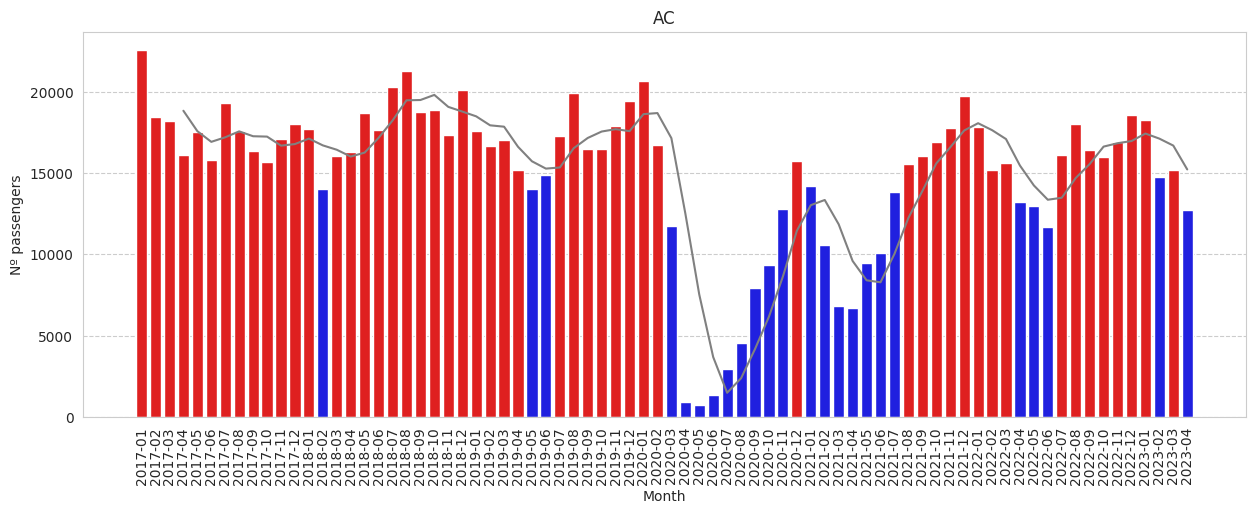

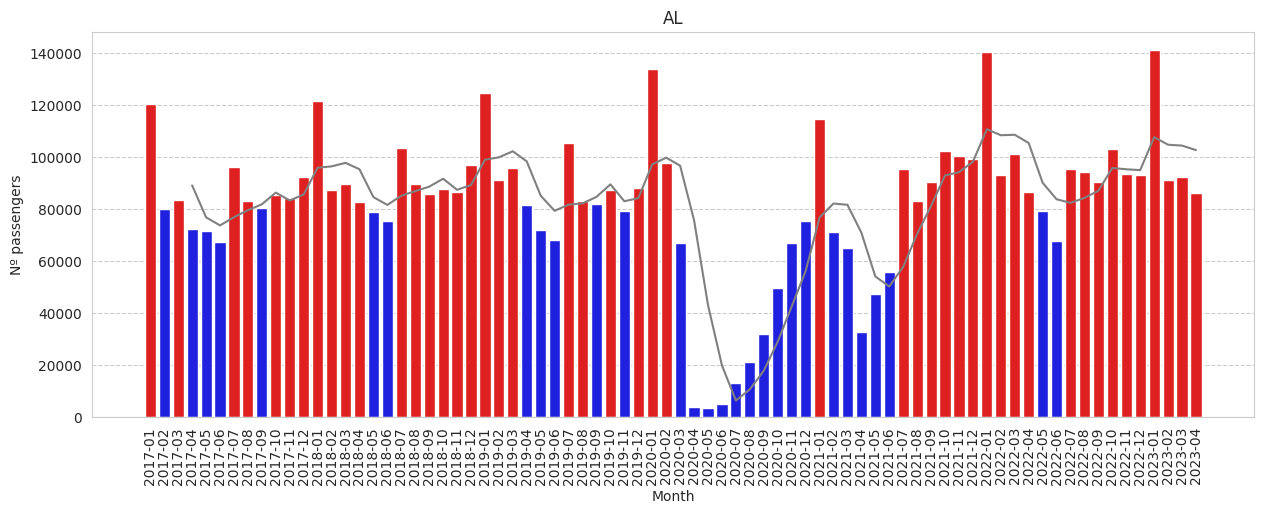

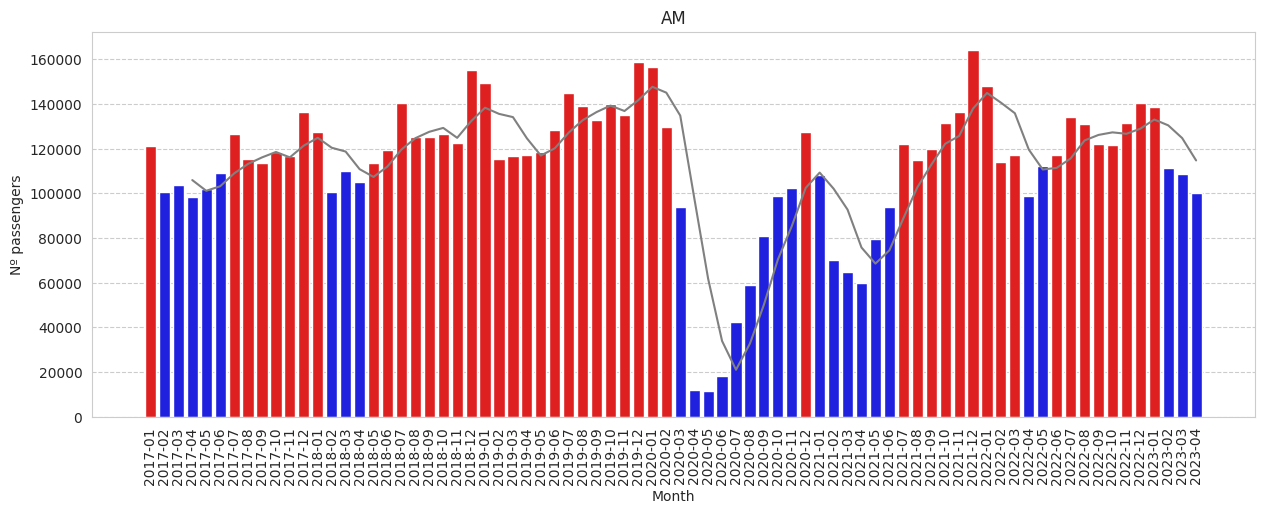

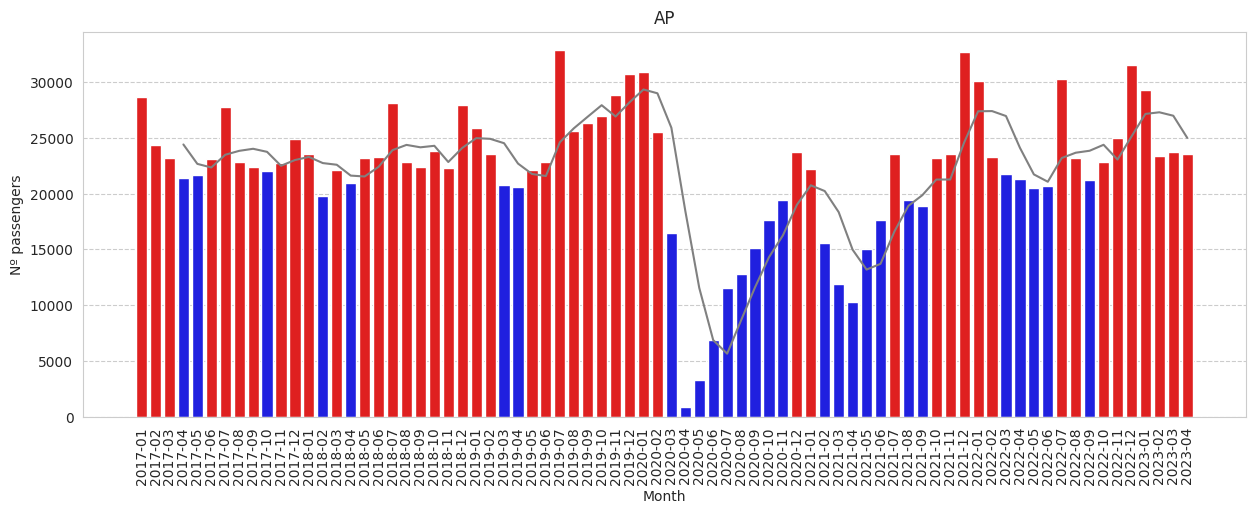

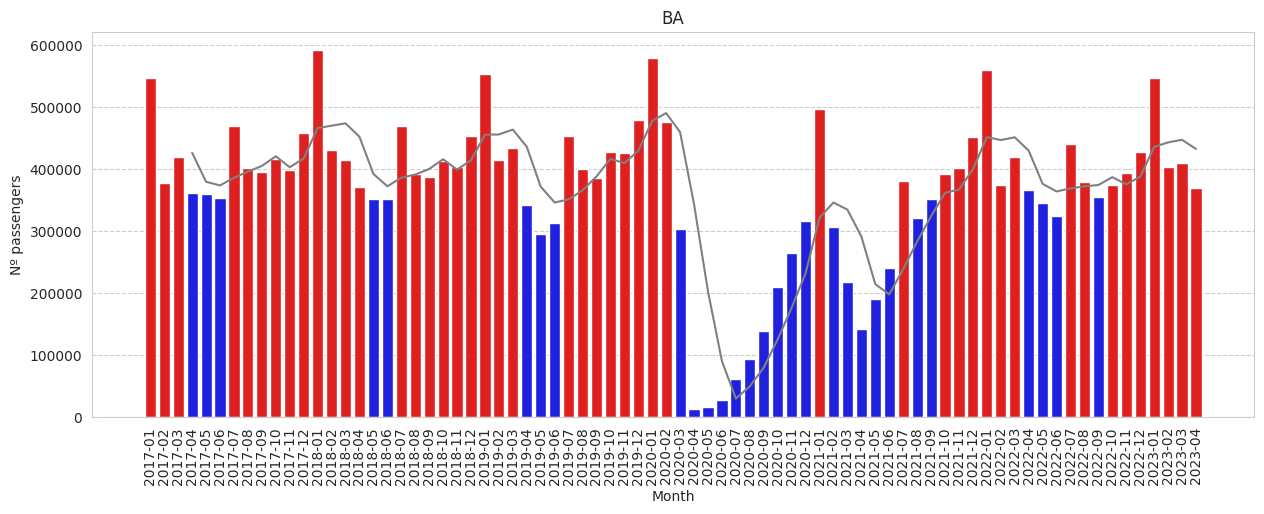

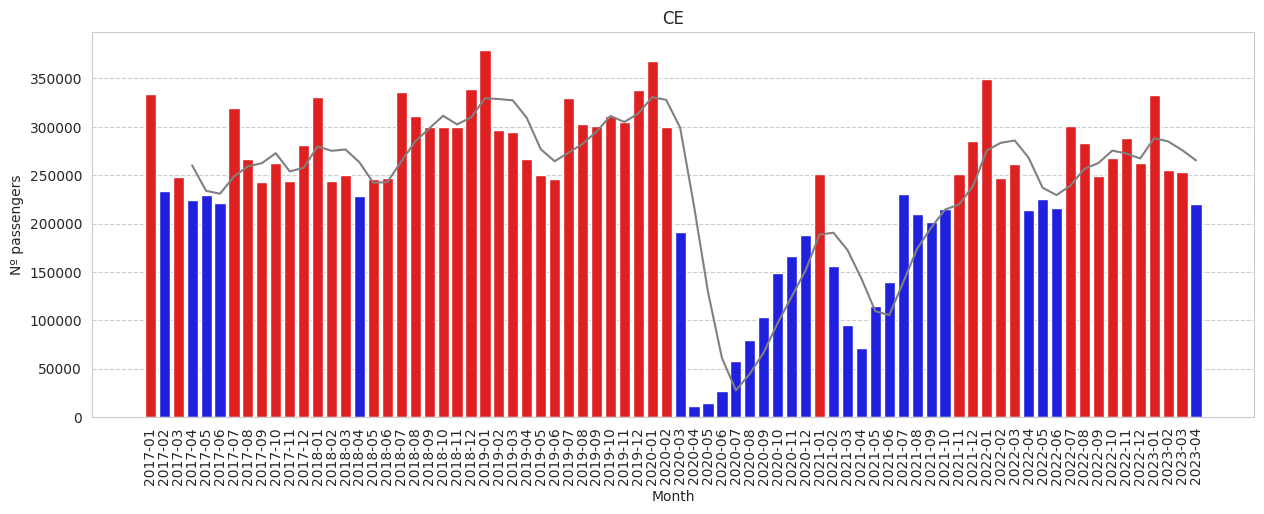

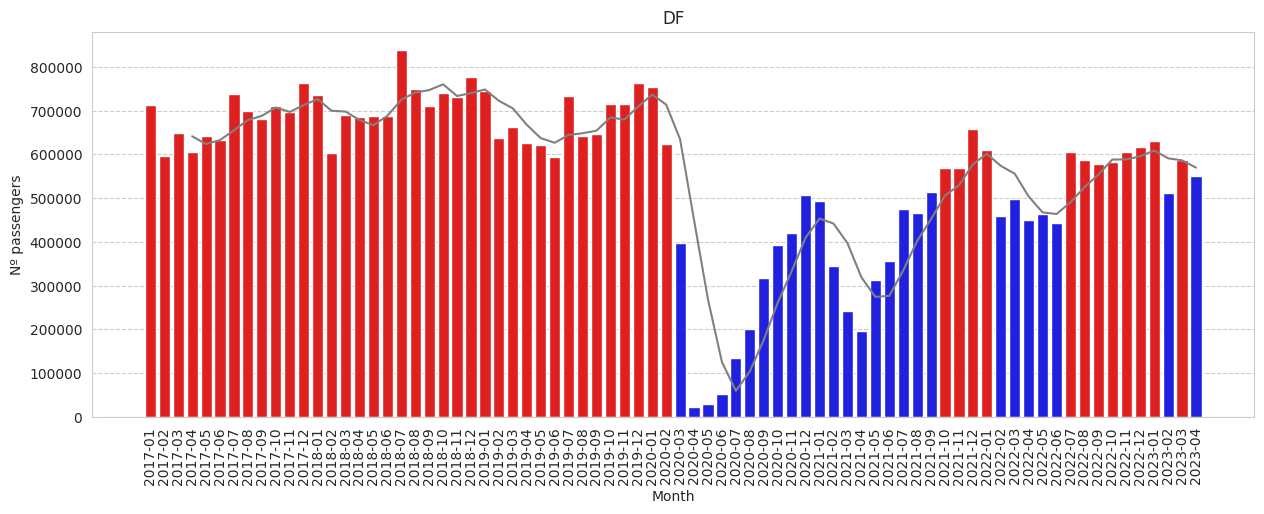

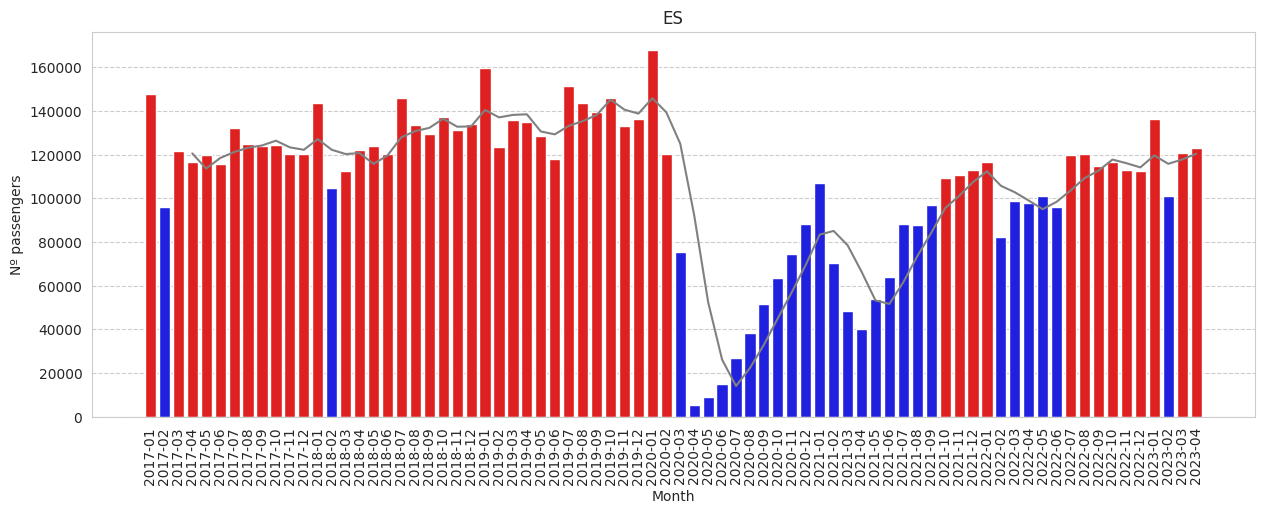

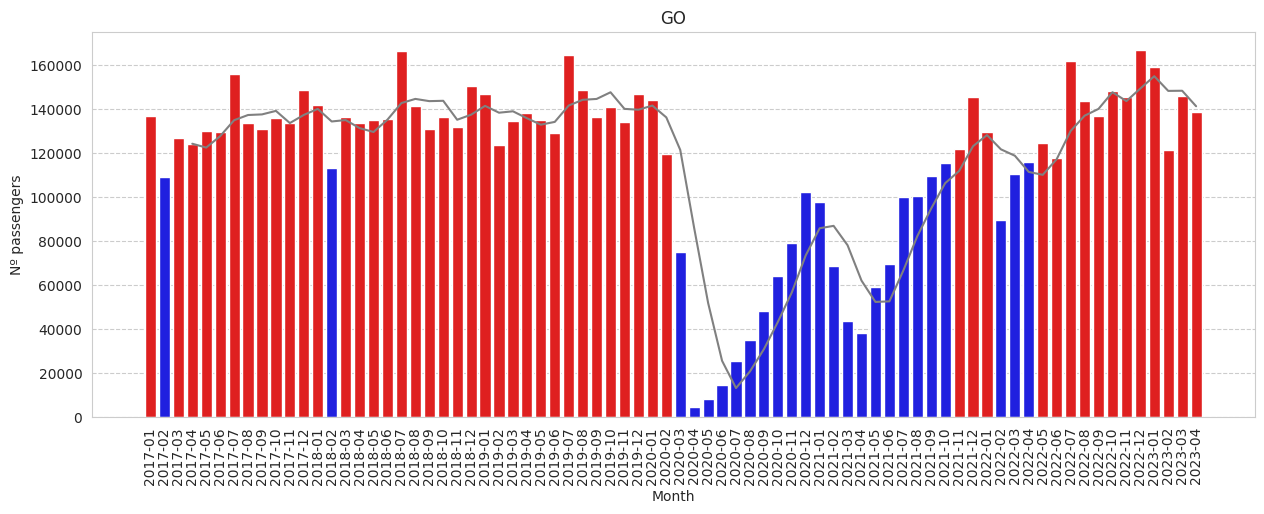

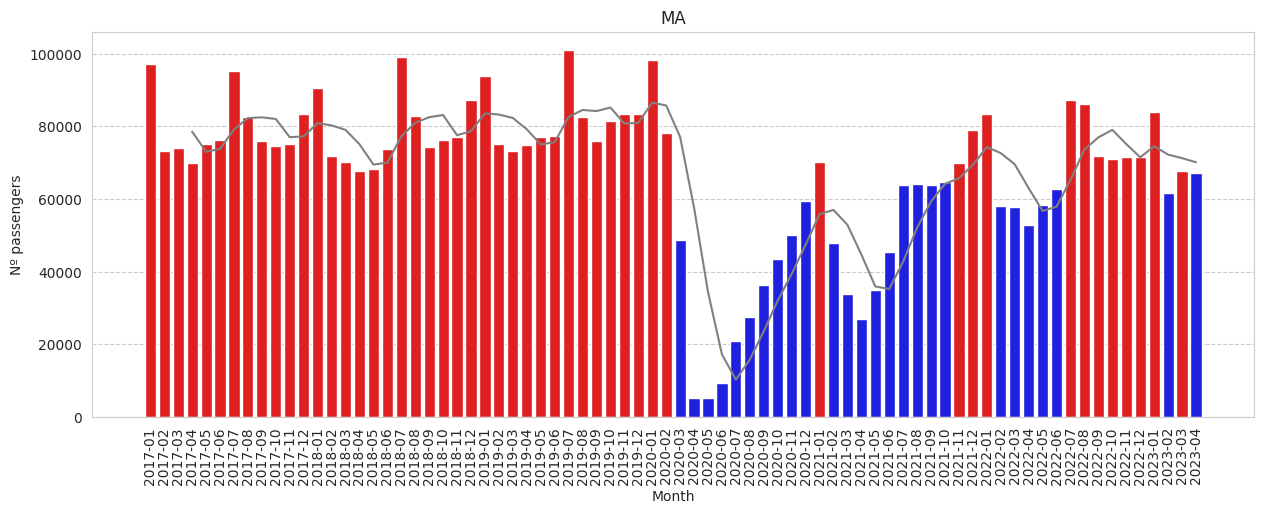

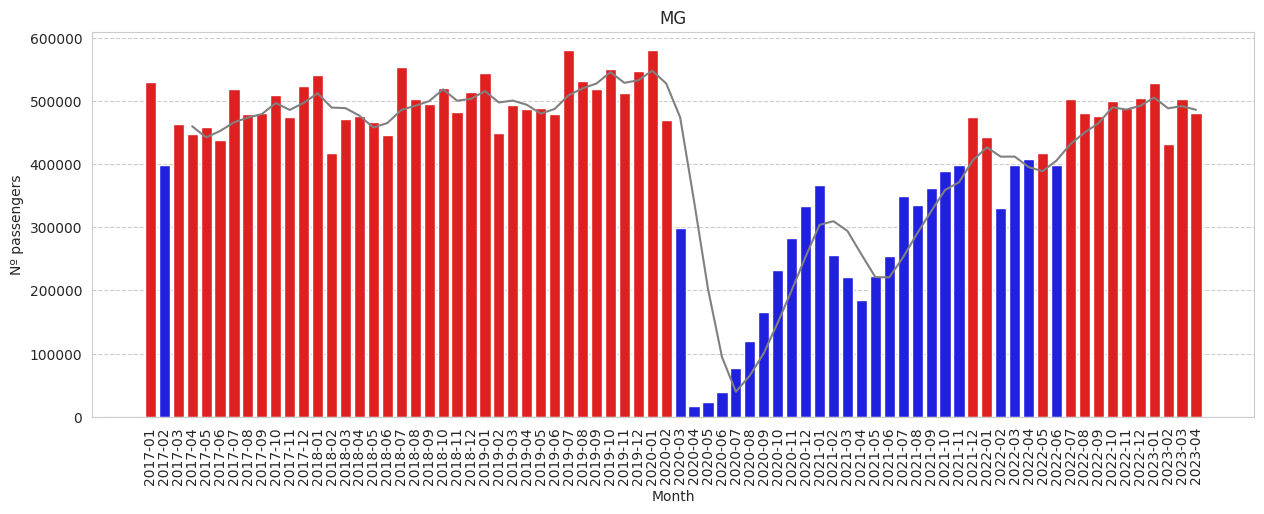

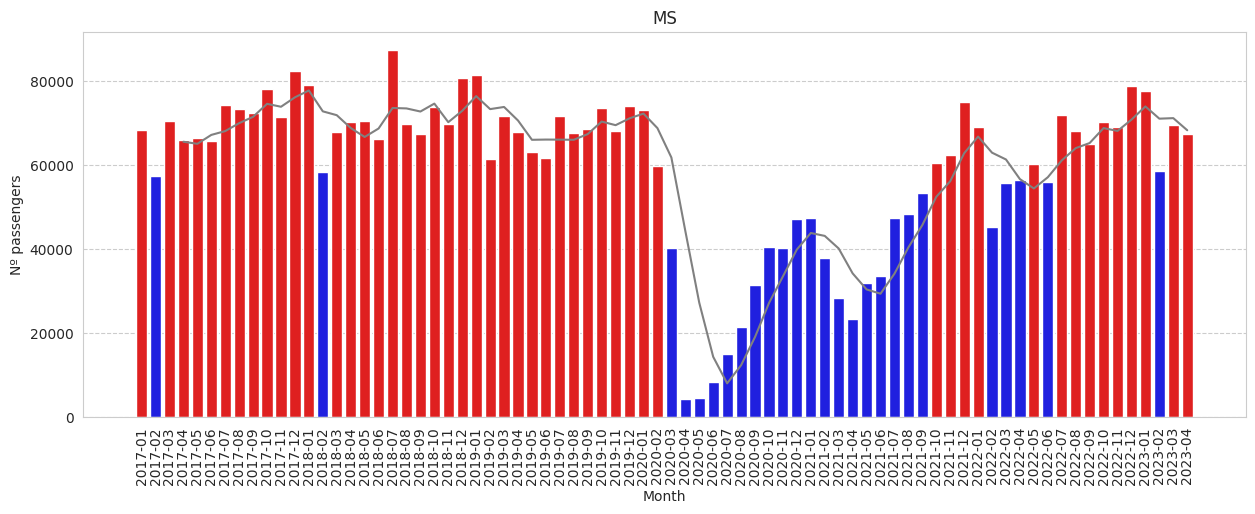

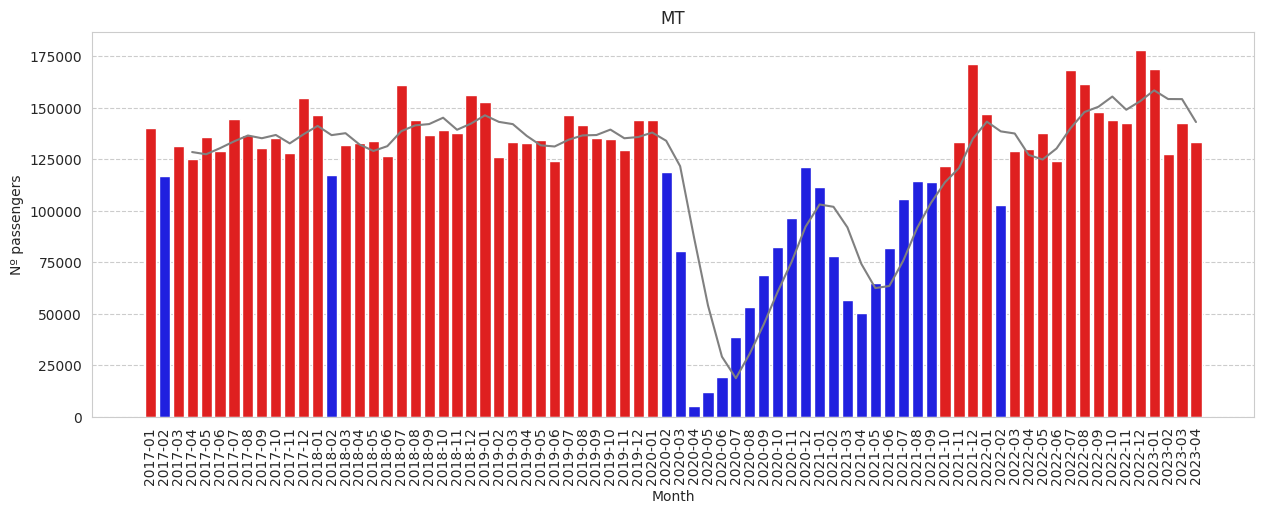

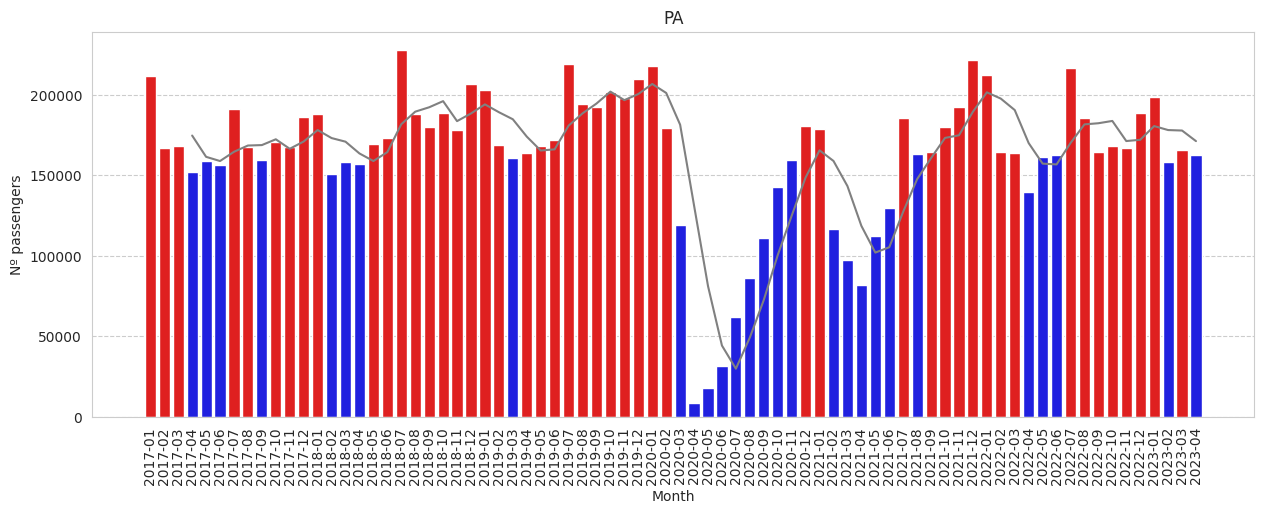

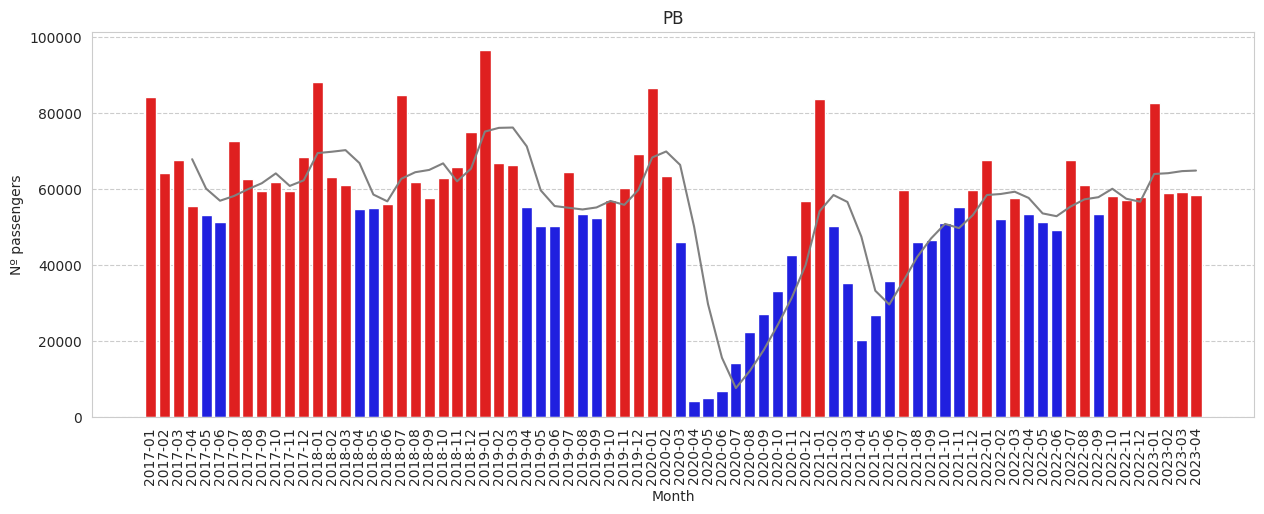

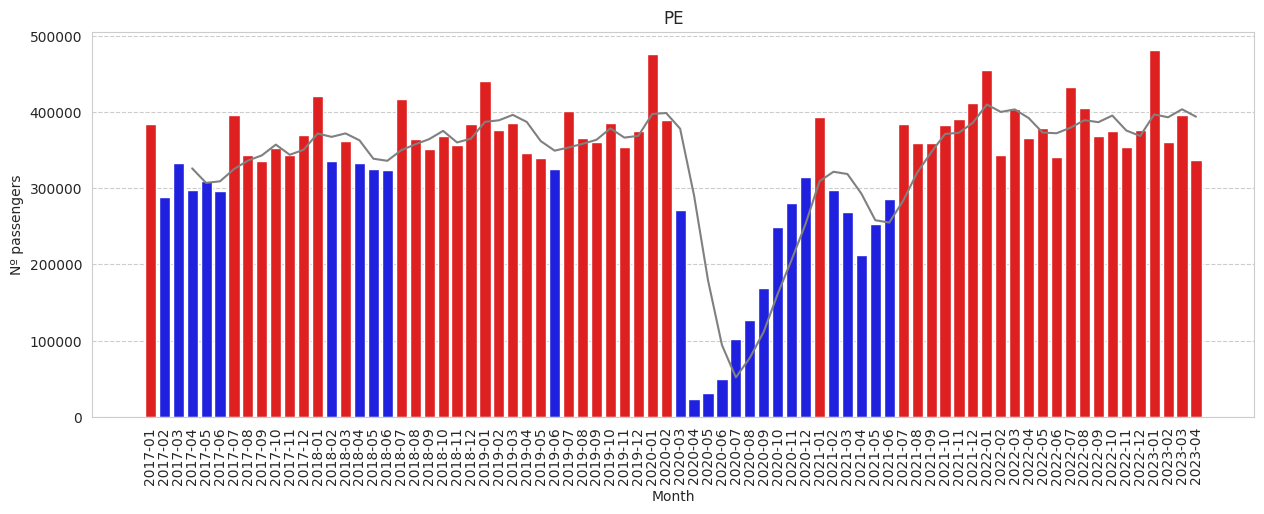

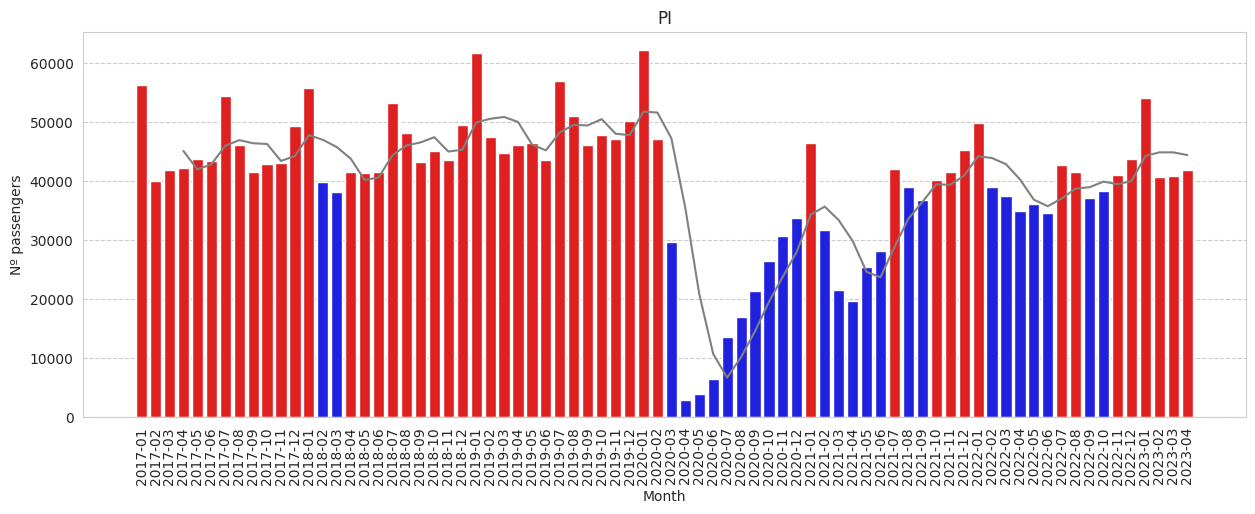

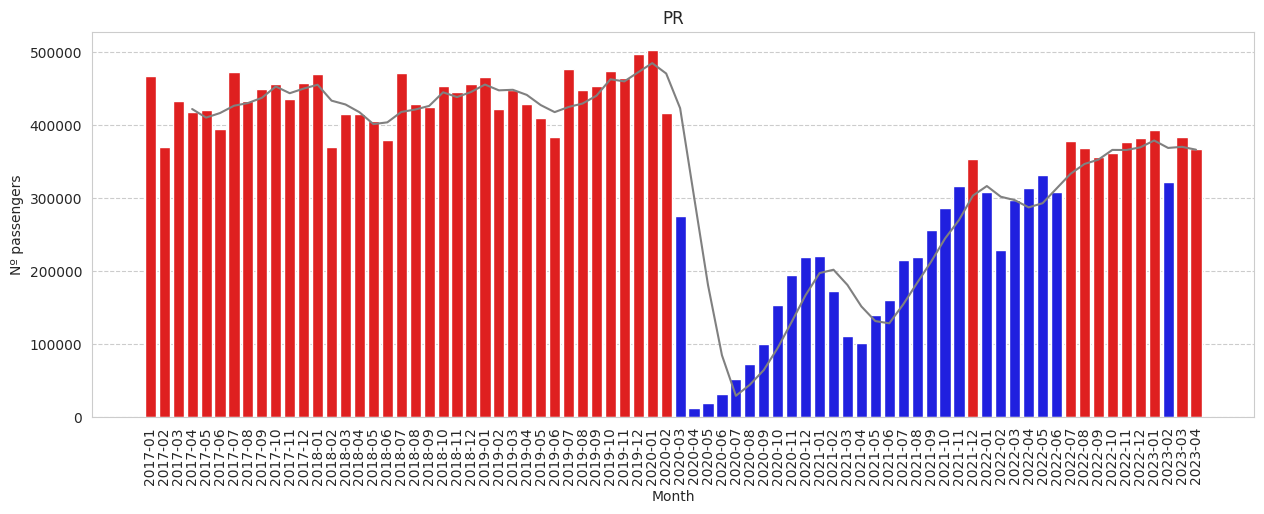

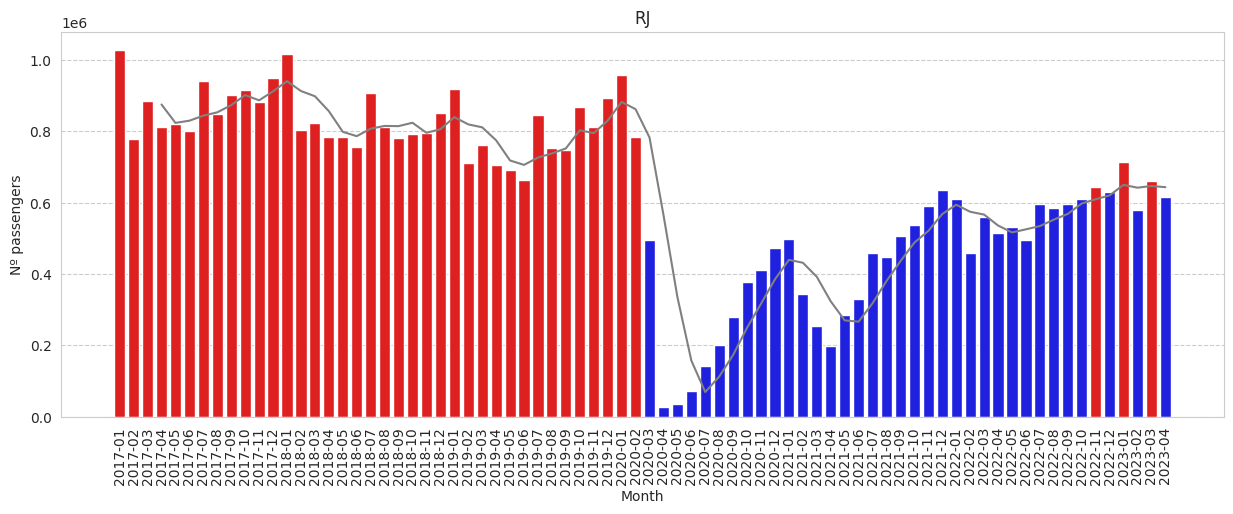

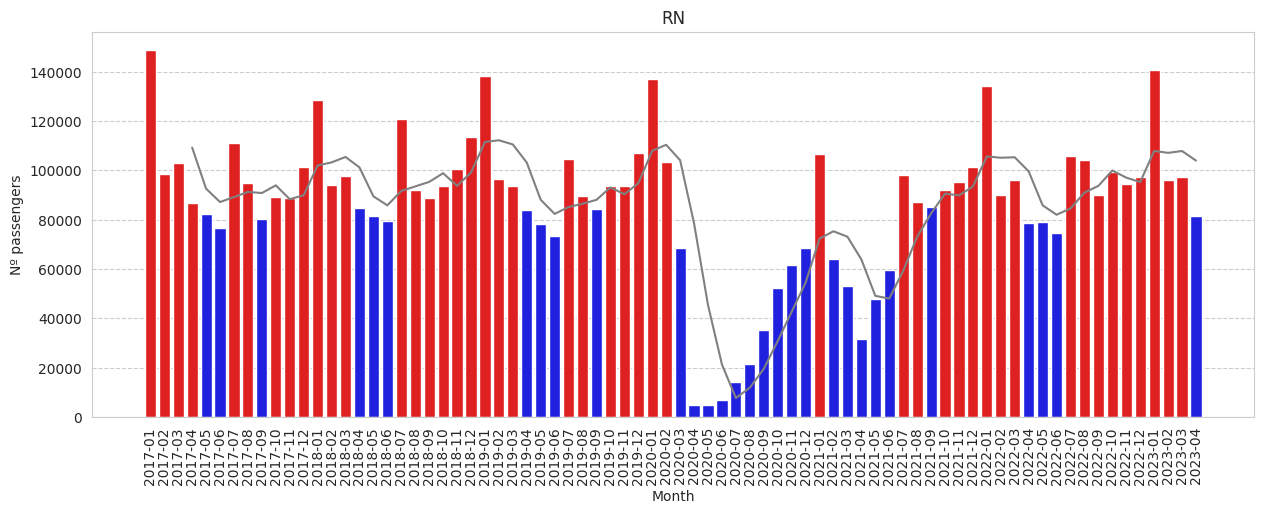

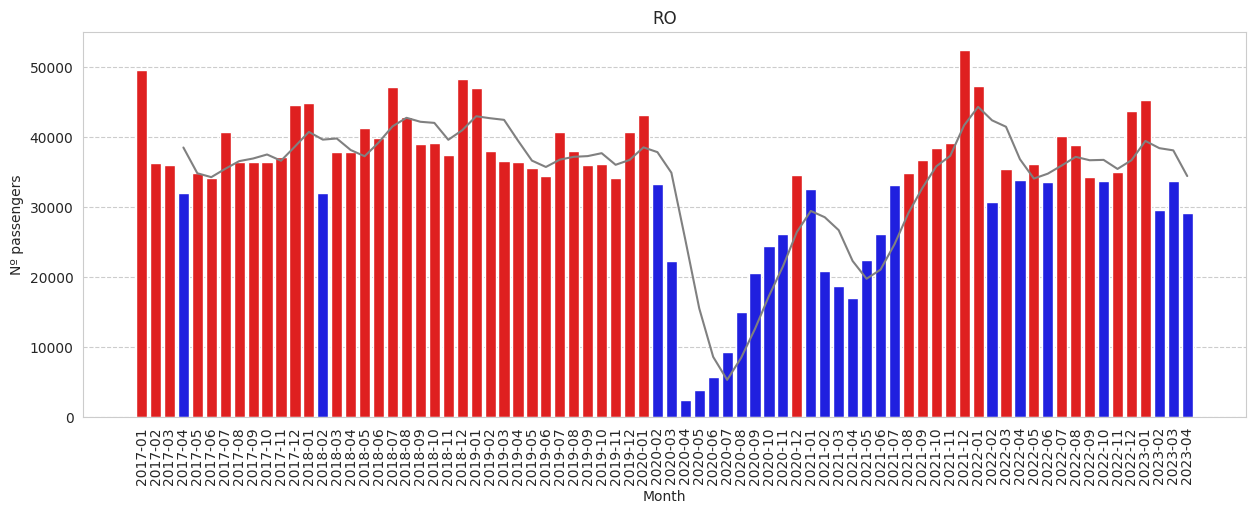

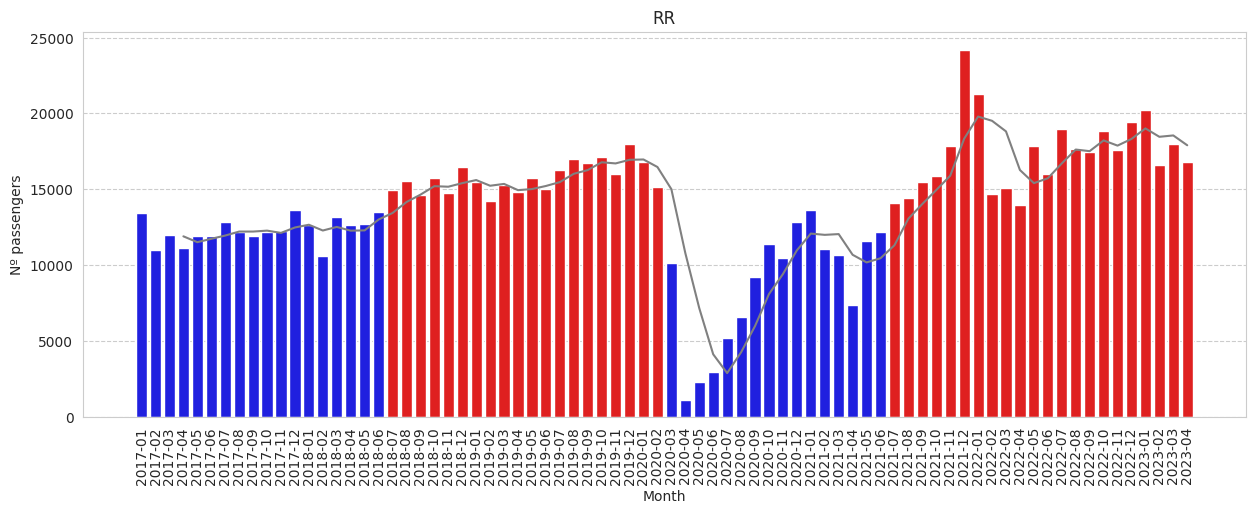

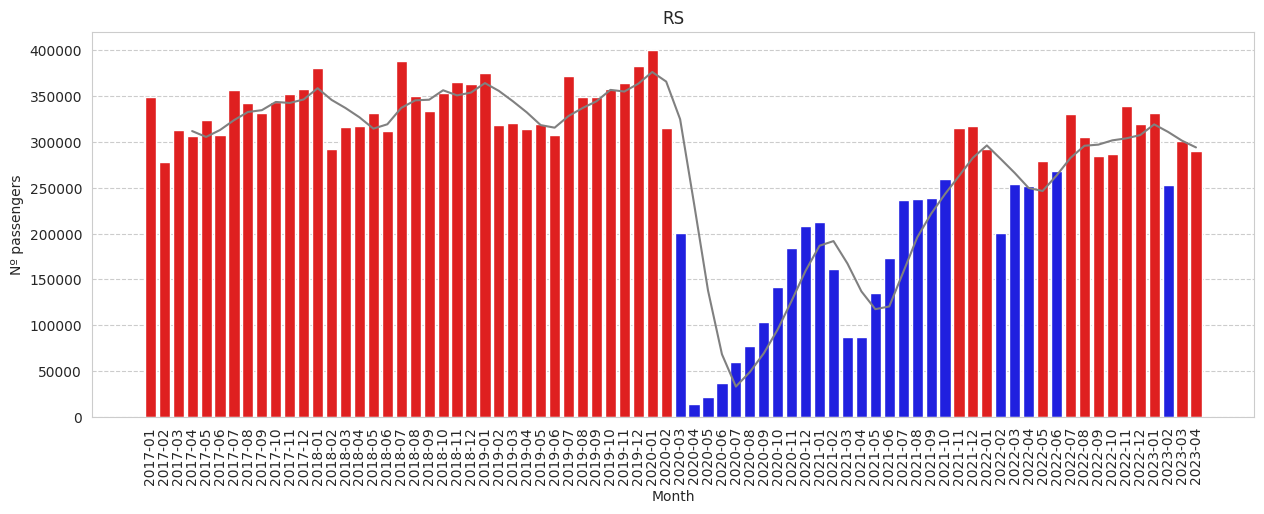

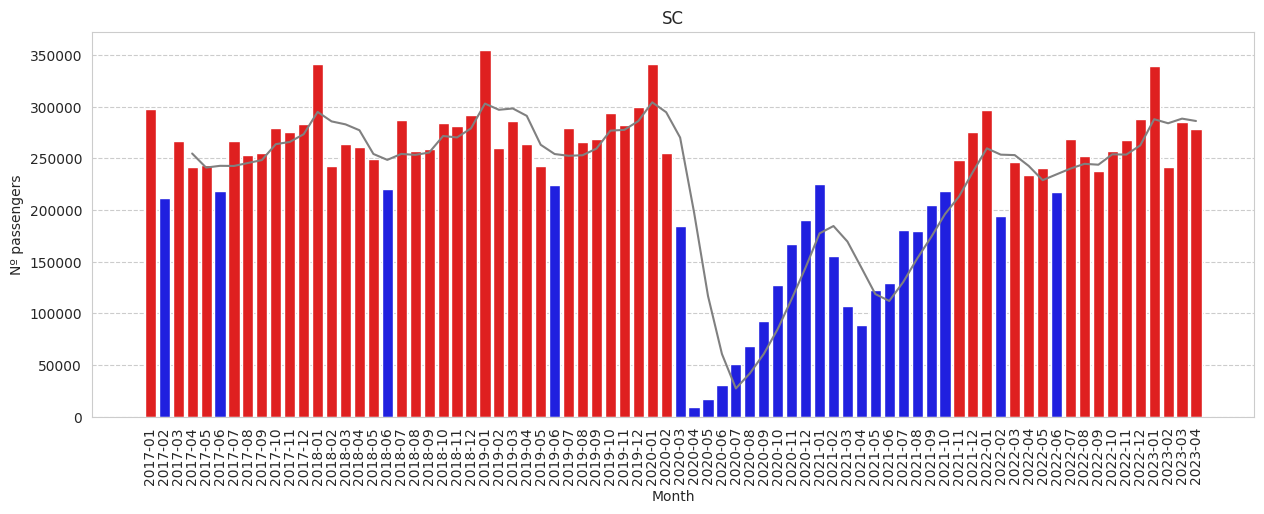

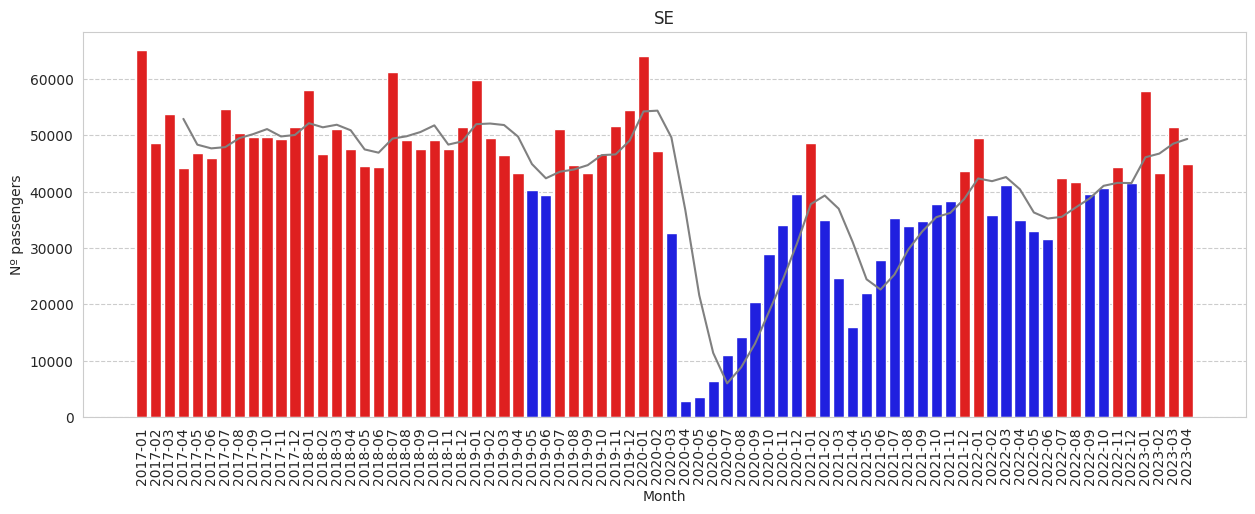

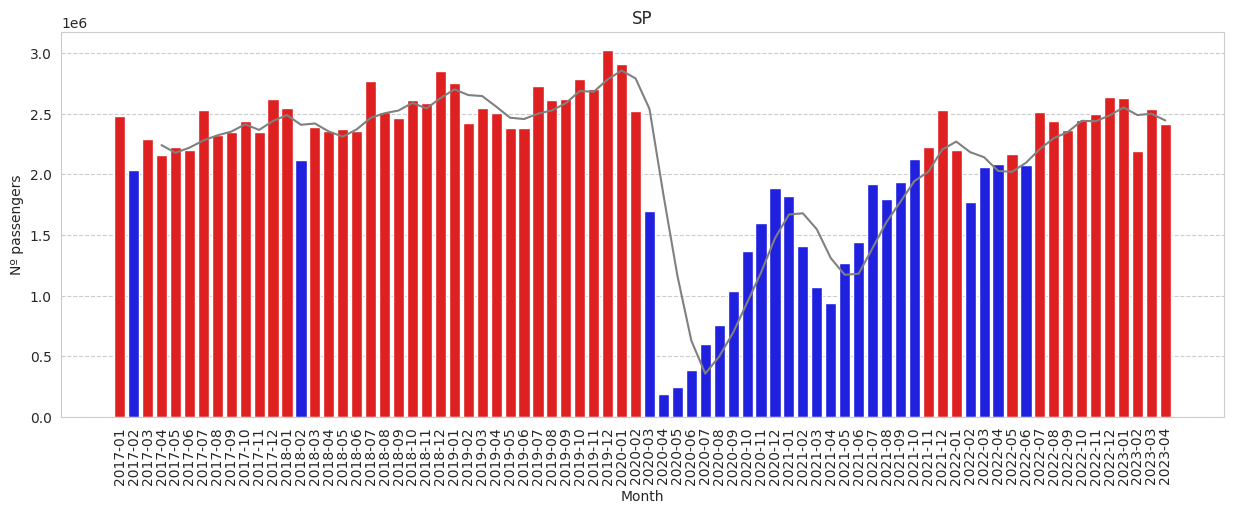

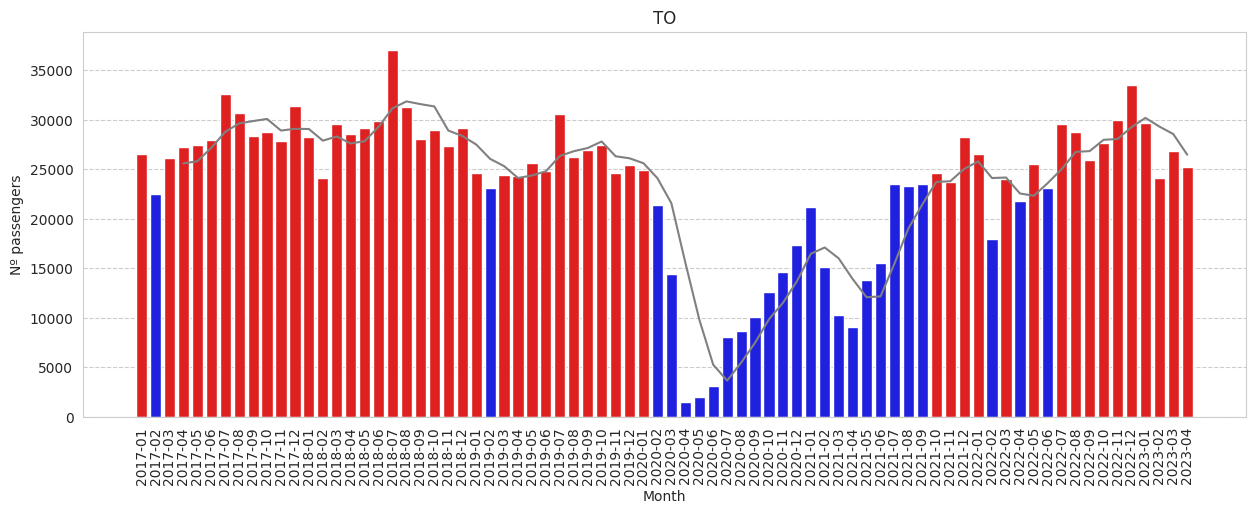

In [34]:
for uf in pass_uf.uf_ori.unique():

    test = pass_uf[pass_uf.uf_ori == uf]
    test = test.rename(columns={'ano':'year', 'mes':'month'})
    test['date'] = pd.to_datetime(test[['year', 'month']].assign(DAY=1))
    test = test.assign(year_m = test['date'].apply("{:%Y-%m}".format))

    #values = np.array(test['aero_pass'])   
    #idx = np.array(test.year_m) 
    #clrs = ['blue' if (x < values.mean()) else 'red' for x in values ]
    
    pd_df = test.sort_values(['year_m']).reset_index(drop=True)
    clrs = ['blue' if (x < pd_df['aero_pass'].mean()) else 'red' for x in pd_df['aero_pass'] ]
    
    pd_df['rol'] = pd_df['aero_pass'].rolling(4).mean()

    fig = plt.figure(figsize =(15, 5))

    ax = sns.barplot(x='year_m', y='aero_pass', data=pd_df, order=pd_df['year_m'],palette = clrs)
    #sns.barplot(x=idx, y=values,rder=result['Id'], palette=clrs) # color=clrs)
    ax2 = sns.lineplot(x='year_m', y='rol', data=pd_df, ax=ax, color = 'grey')
    

    #plt.axhline(y = test.aero_pass.mean(), color = 'grey', label = 'axvline - full height')
    plt.xticks(rotation = 90); 
    
    ax.set_title(uf)
    ax.set(xlabel='Month', ylabel='Nº passengers');
    

In [47]:
pass_uf.head()

ano  mes uf_ori  aero_pass
0  2017    1     AC      22552
1  2017    1     AL     120491
2  2017    1     AM     121220
3  2017    1     AP      28632
4  2017    1     BA     546669

In [48]:
pass_uf.mes = pass_uf.mes.astype(int)

In [49]:
pass_uf[pass_uf.ano == '2017']

ano  mes uf_ori  aero_pass
0    2017    1     AC      22552
1    2017    1     AL     120491
2    2017    1     AM     121220
3    2017    1     AP      28632
4    2017    1     BA     546669
..    ...  ...    ...        ...
319  2017   12     RS     357844
320  2017   12     SC     283468
321  2017   12     SE      51503
322  2017   12     SP    2622480
323  2017   12     TO      31361

[324 rows x 4 columns]

In [50]:
pass_uf.groupby(['ano'])['aero_pass'].sum().reset_index()#.aero_pass.mean()

ano  aero_pass
0  2017   92214975
1  2018   95638382
2  2019   97140396
3  2020   46284385
4  2021   63844084
5  2022   84020785
6  2023   29975970

In [51]:
pass_uf.groupby(['mes'])['aero_pass'].sum().reset_index().aero_pass.sum()

509118977

In [52]:
month_count = pass_uf.groupby(['mes','uf_ori'])['aero_pass'].sum().reset_index()

In [53]:
month_count.mes = month_count.mes.astype(int)

In [54]:
month_count[month_count.uf_ori == 'AC'].sort_values(['mes'])

mes uf_ori  aero_pass
0      1     AC     128757
27     2     AC     106353
54     3     AC     100618
81     4     AC      81169
108    5     AC      73293
135    6     AC      71423
162    7     AC      89761
189    8     AC      96925
216    9     AC      91909
243   10     AC      93236
270   11     AC      99857
297   12     AC     111582

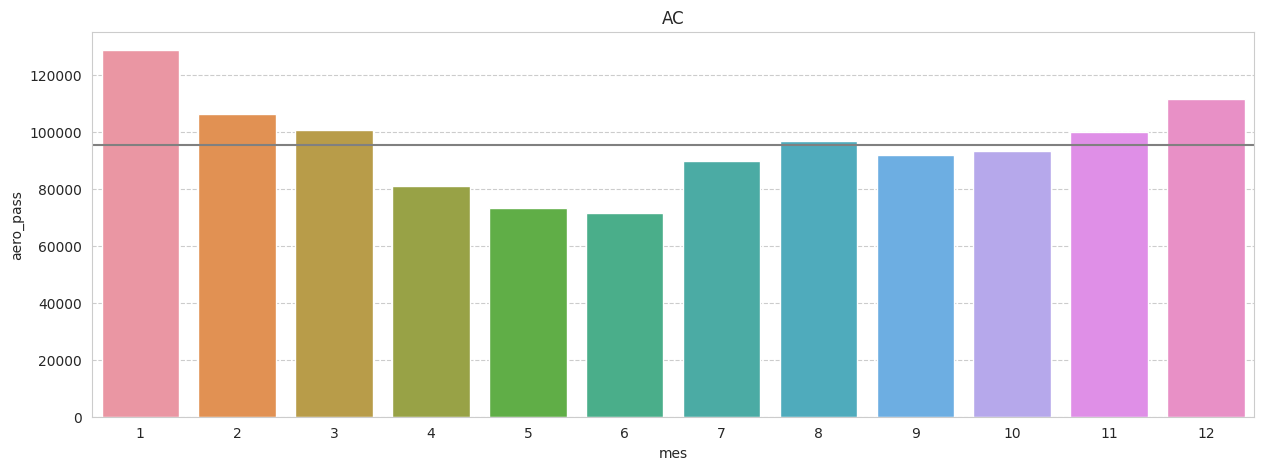

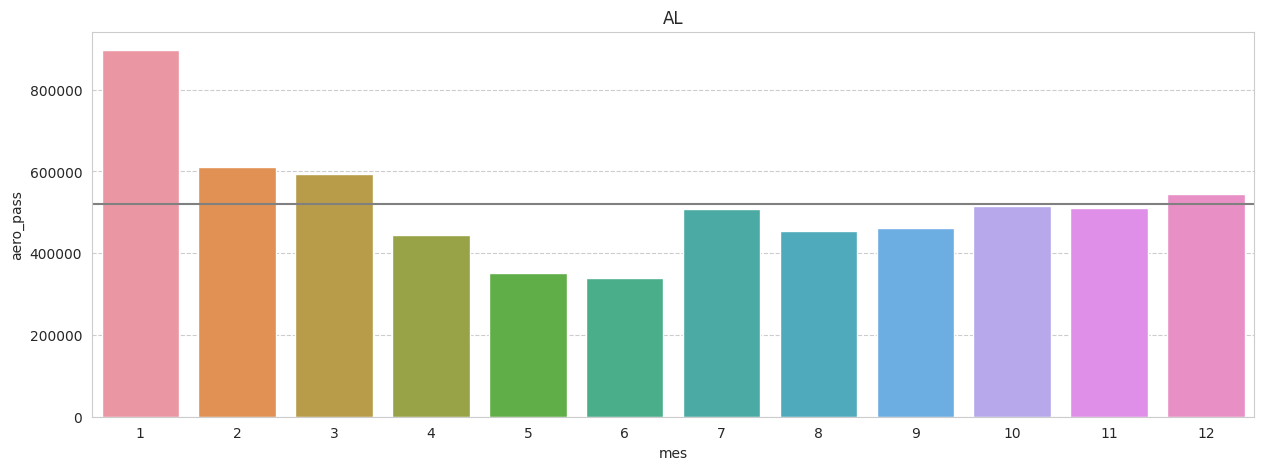

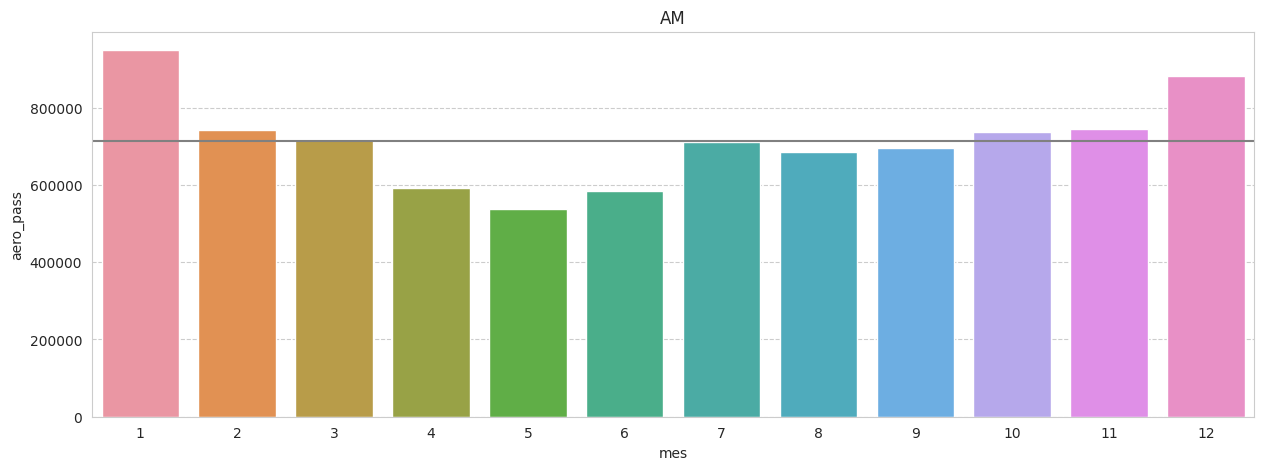

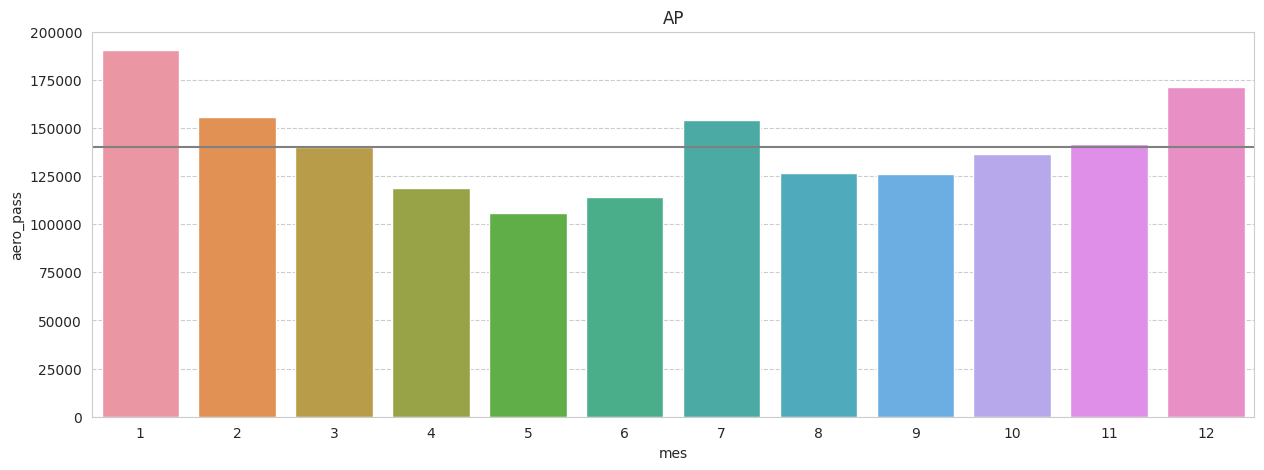

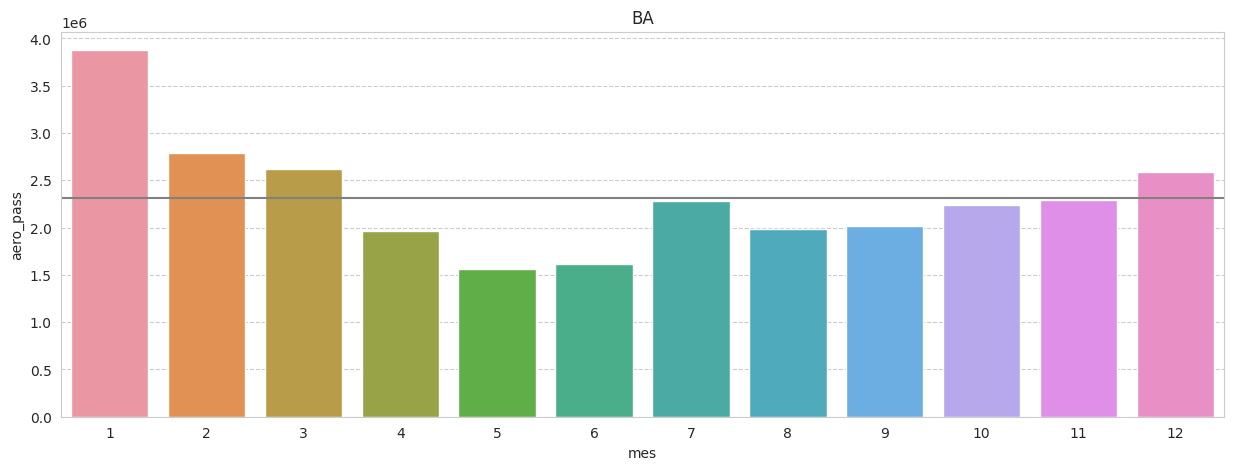

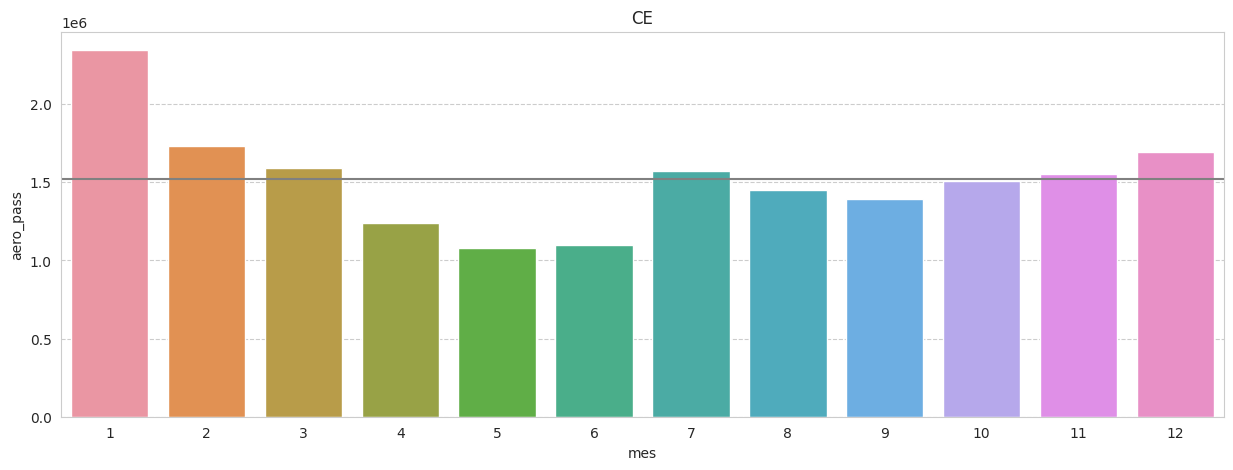

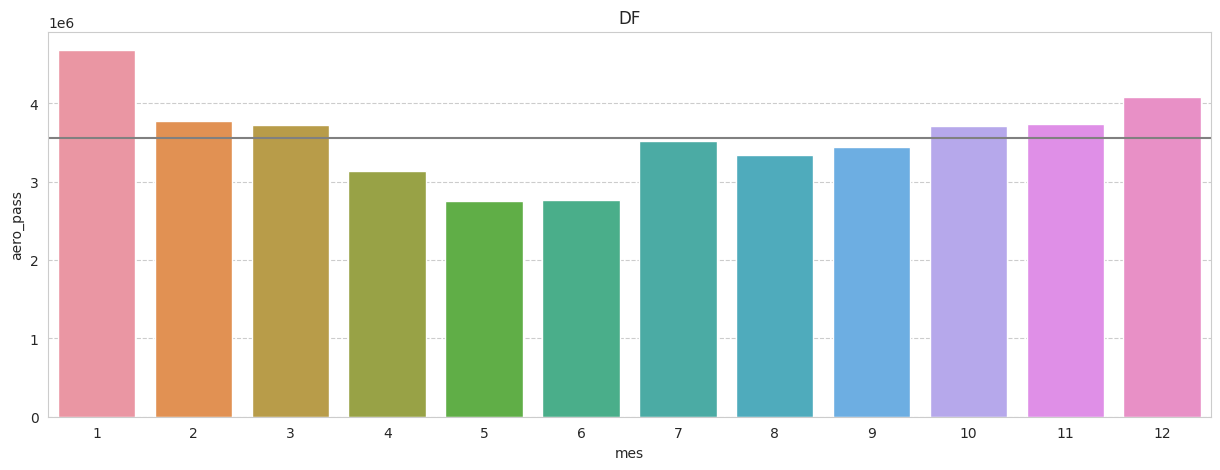

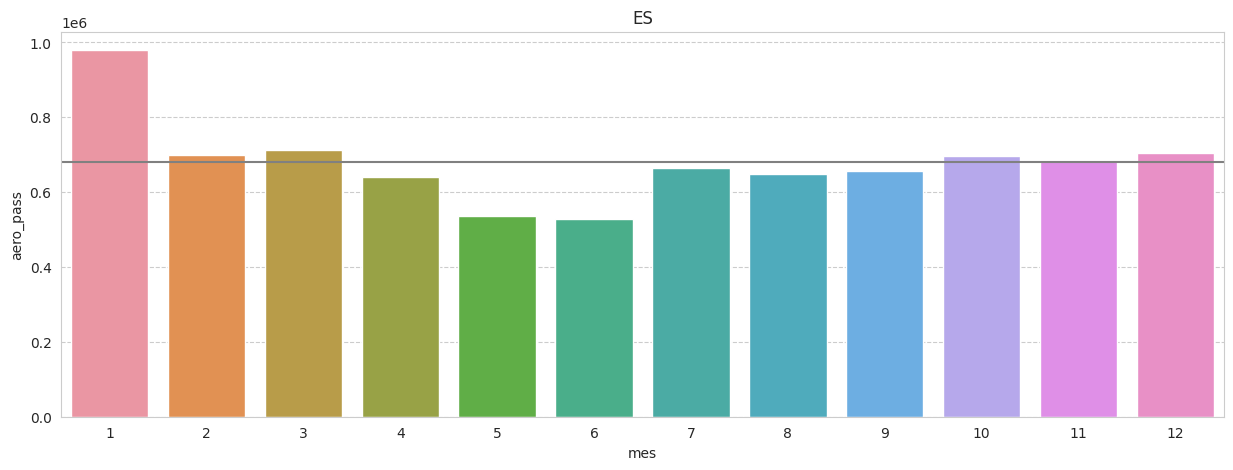

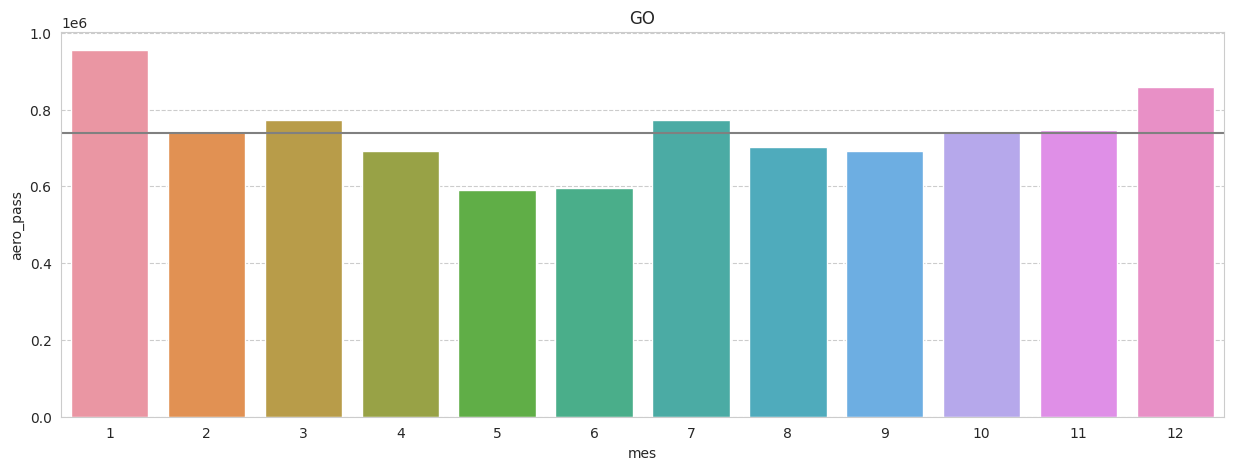

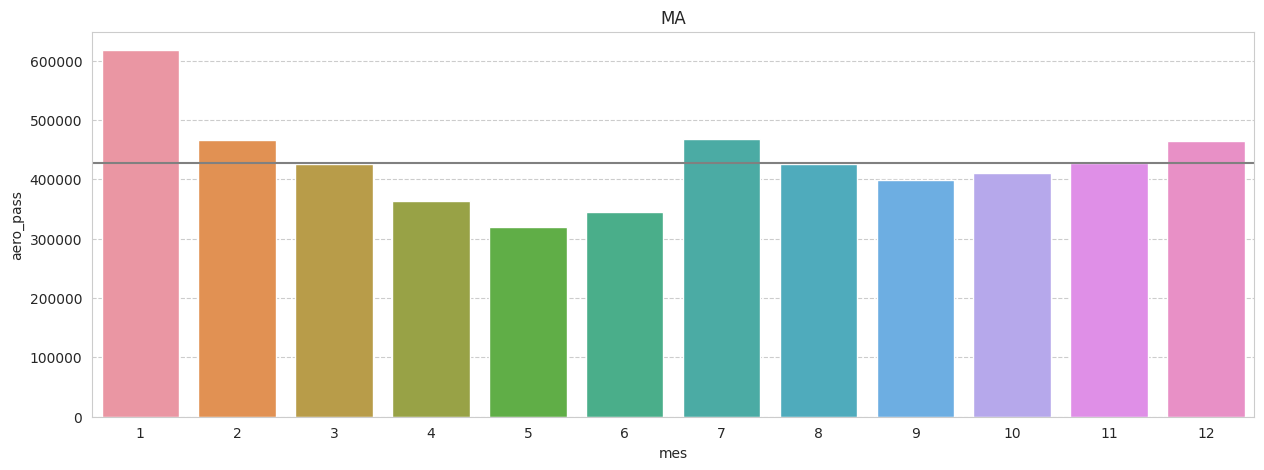

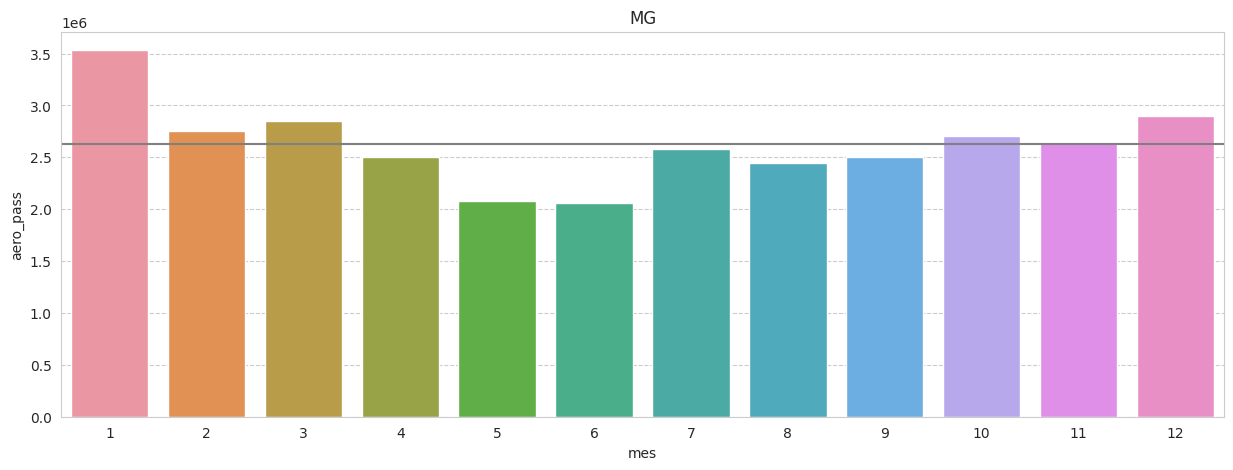

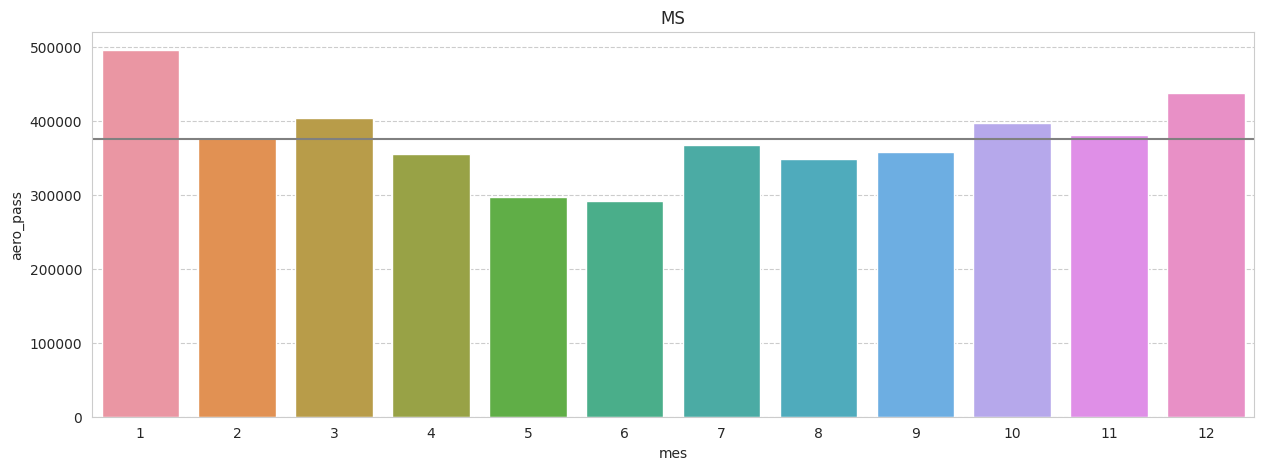

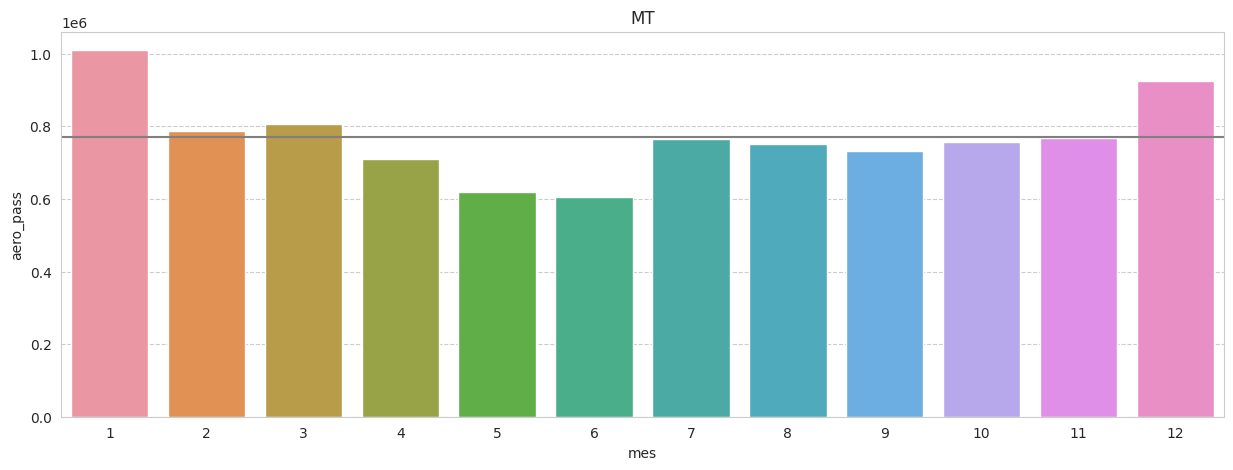

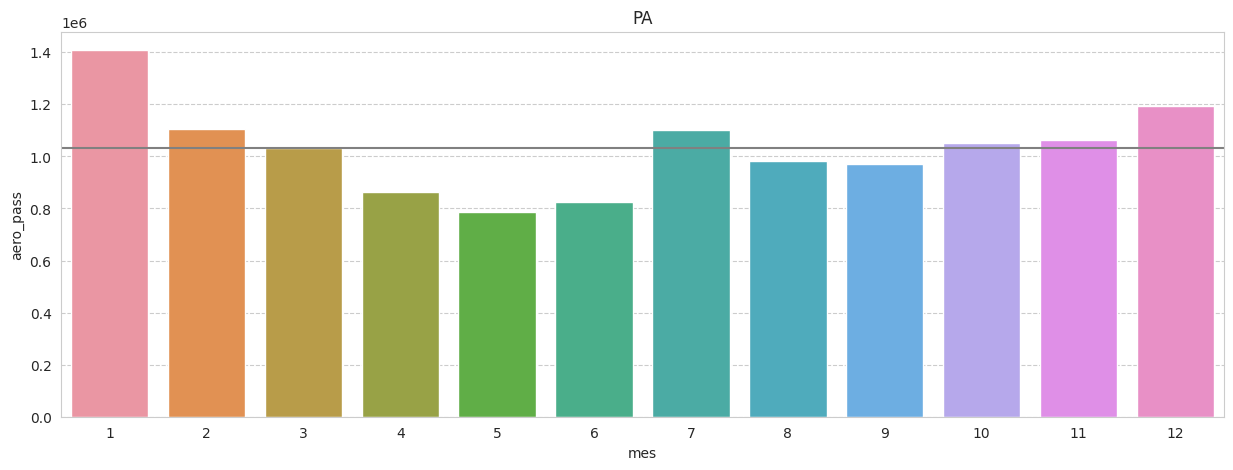

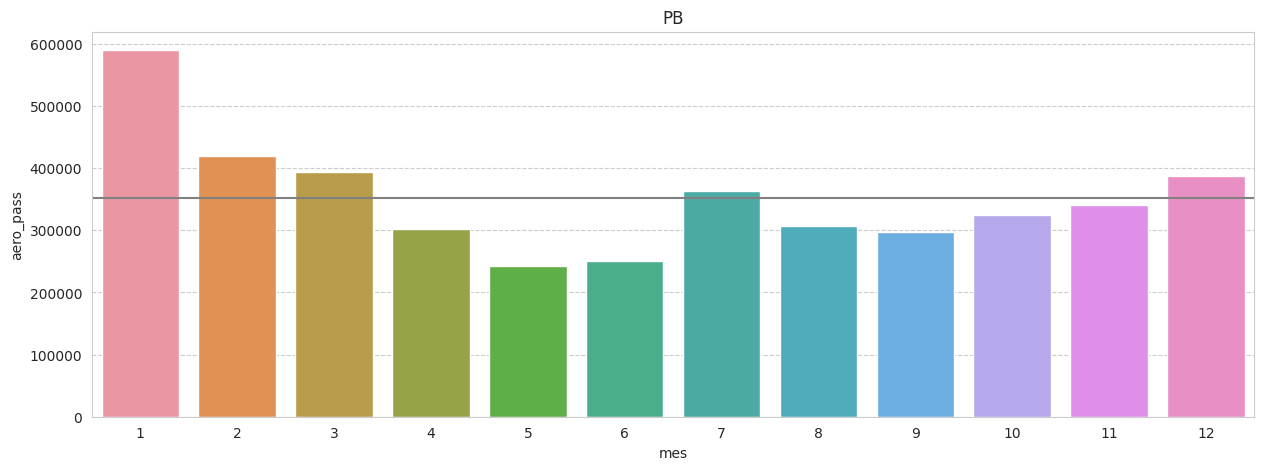

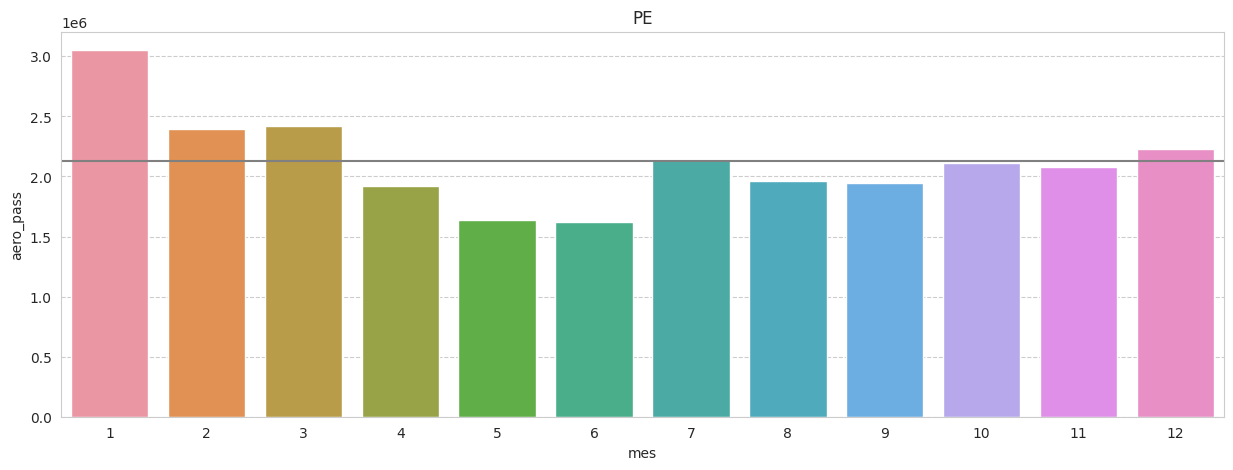

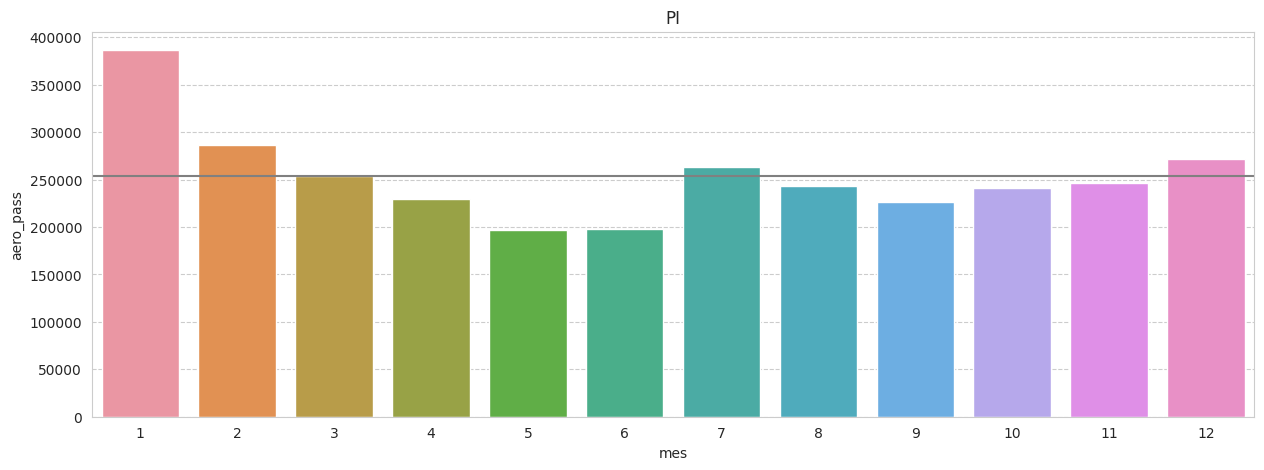

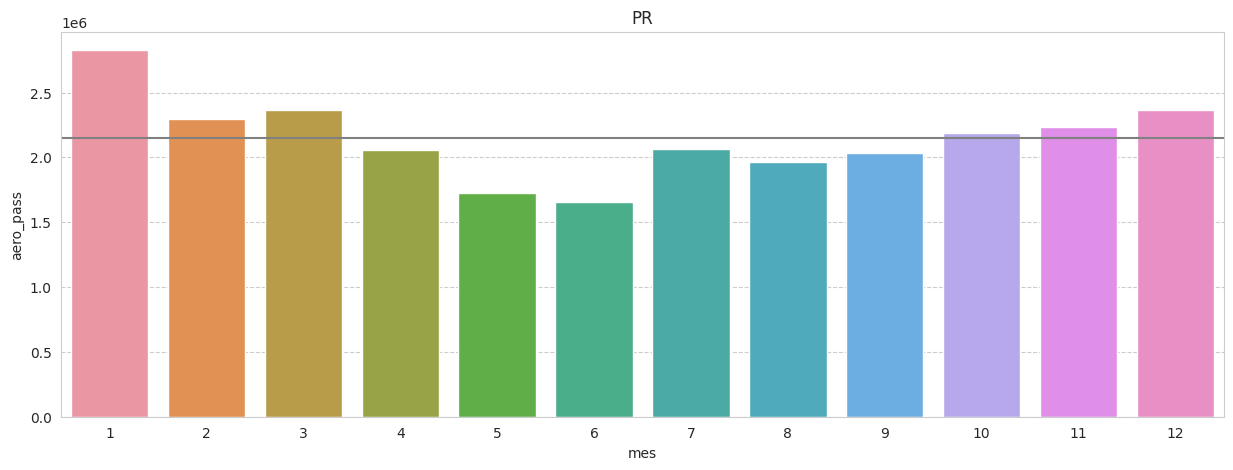

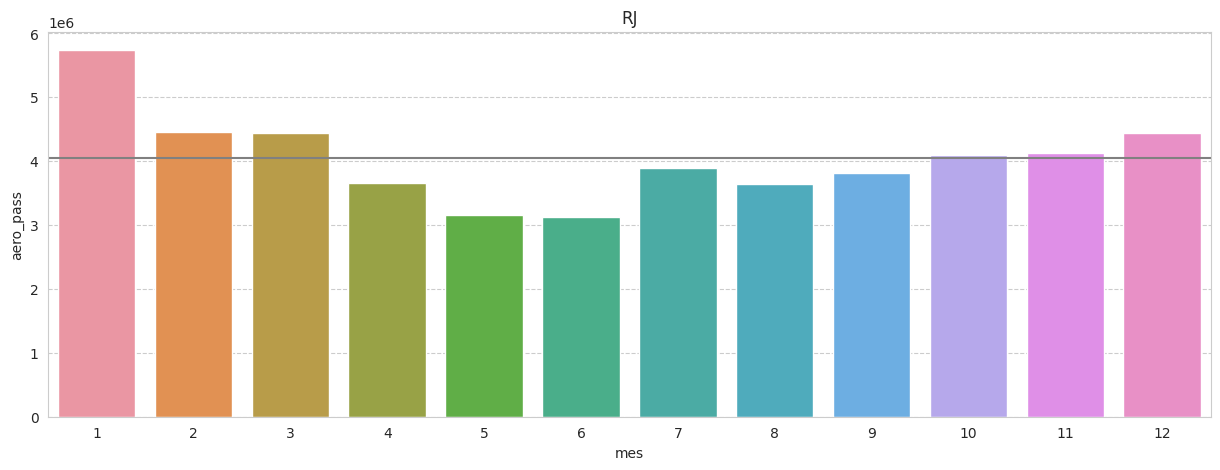

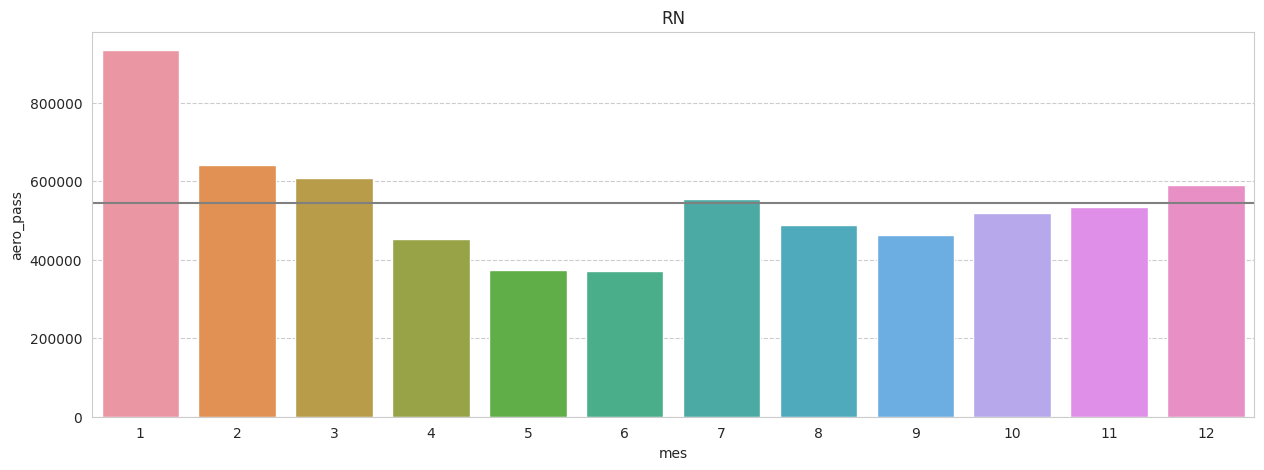

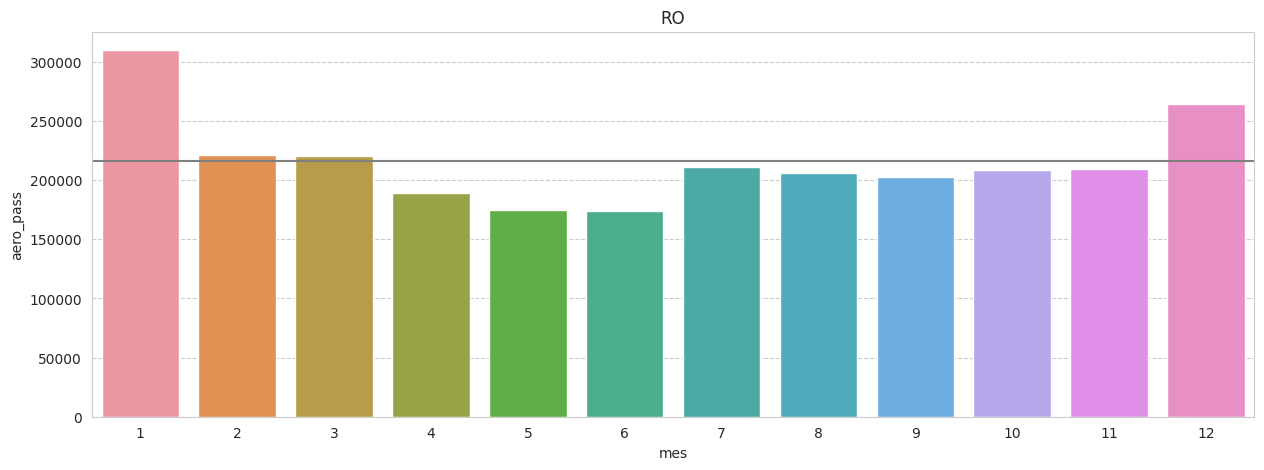

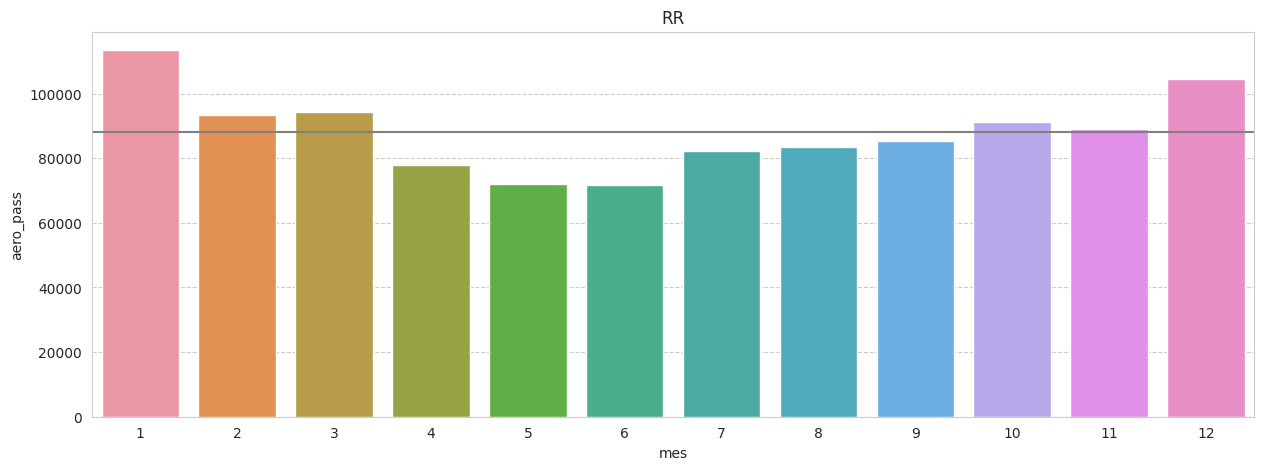

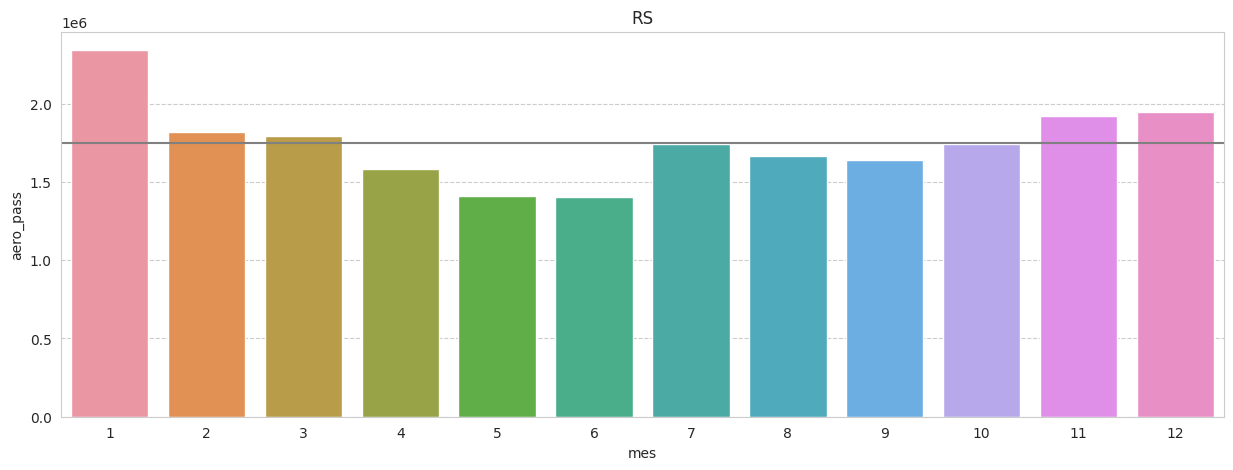

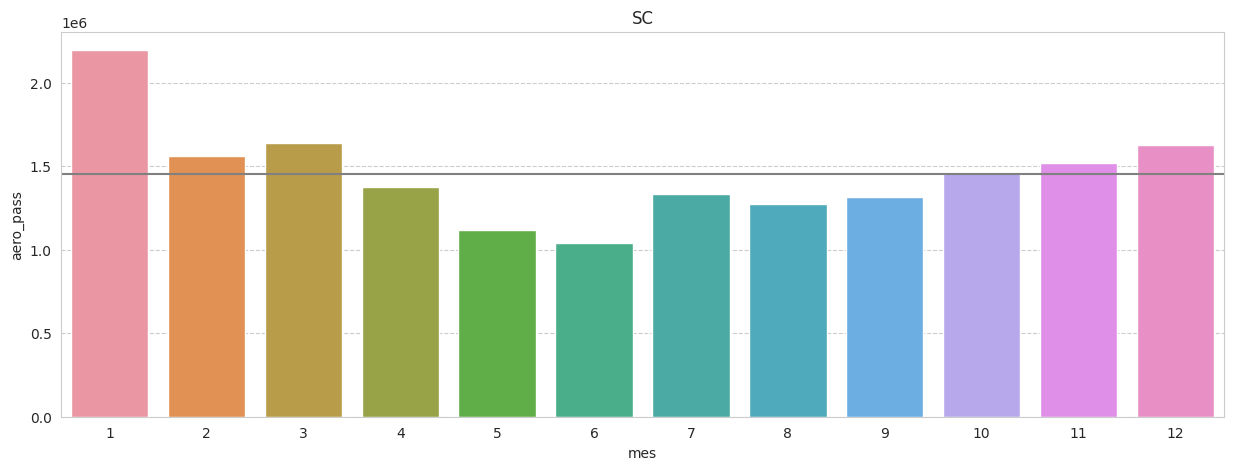

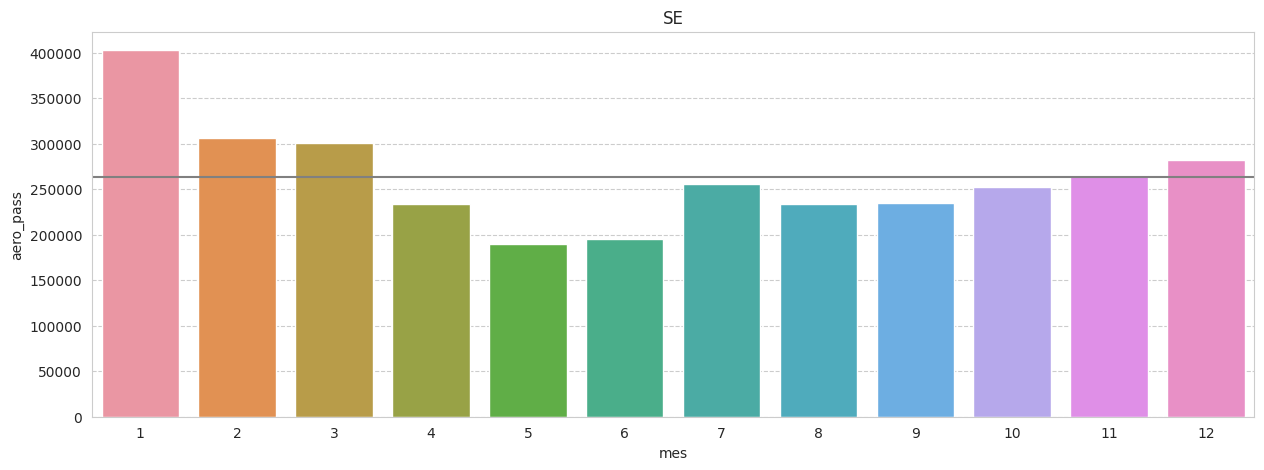

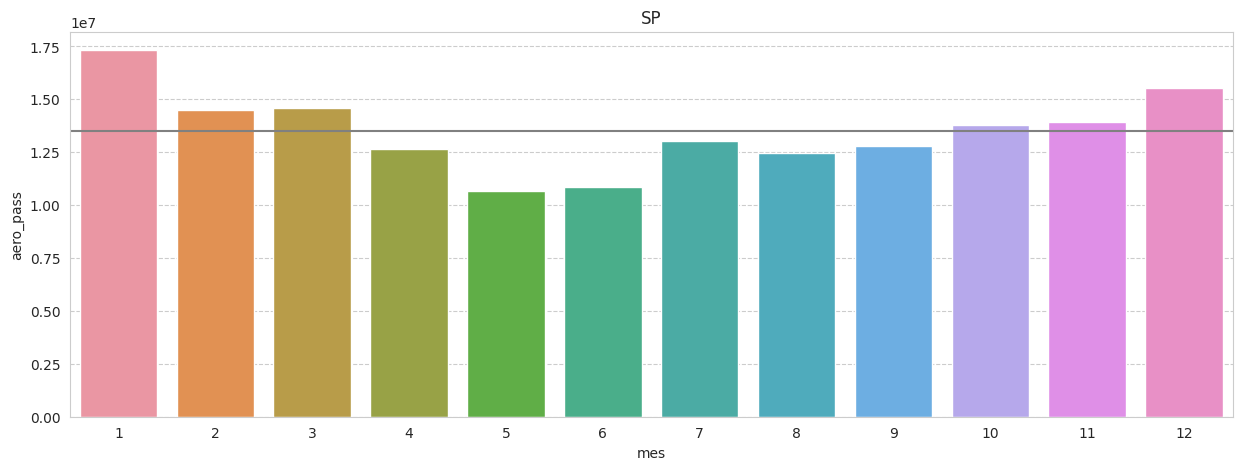

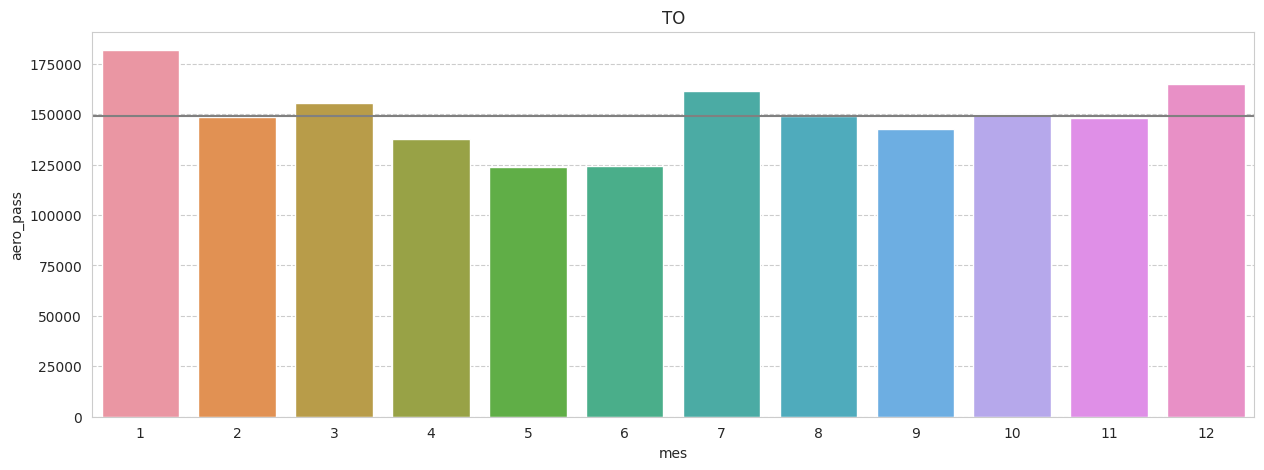

In [55]:
#fig = plt.figure(figsize =(15, 5))

for uf in pass_uf.uf_ori.unique():
    
    fig = plt.figure(figsize =(15, 5))

    ax = sns.barplot(x='mes', y='aero_pass', data=month_count[month_count.uf_ori == uf])
                 
    plt.axhline(y = month_count[month_count.uf_ori == uf].aero_pass.mean(), 
            color = 'grey', label = 'axvline - full height')
    
    ax.set_title(uf)
    
    plt.show()

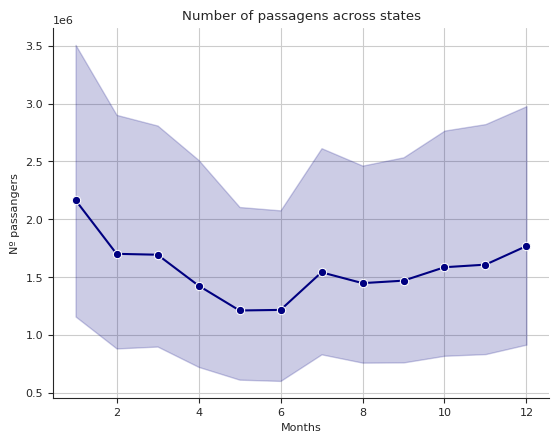

In [43]:
#Set the style and font sizes
sns.set_style('ticks')
plt.rcParams.update({'font.size': 8})
 
# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='mes', y='aero_pass', data=month_count, marker='o', color='navy')
#sns.lineplot(x='Months', y='Product B', data=df, marker='s', color='teal', label='Product B')
#sns.lineplot(x='Months', y='Product C', data=df, marker='D', color='salmon', label='Product C')
 
# Set plot title and axes labels
plt.title('Number of passagens across states')
plt.xlabel('Months')
plt.ylabel('Nº passangers')
 
# Add a legend
#plt.legend(loc='lower right')
 
# Add a grid
plt.grid(True)
 
# Remove the top and right spines
sns.despine()
 
# Show the plot
plt.show()

In [29]:
comparison = month_count.groupby(['mes'])['aero_pass'].mean().reset_index()

In [33]:
comparison

mes     aero_pass
0     1  2.500658e+06
1     2  1.970562e+06
2     3  1.966169e+06
3     4  1.686020e+06
4     5  1.475864e+06
5     6  1.475144e+06
6     7  1.847862e+06
7     8  1.726868e+06
8     9  1.737678e+06
9    10  1.861327e+06
10   11  1.881829e+06
11   12  2.069273e+06

In [32]:
comparison.aero_pass*100/74922483

0     3.337660
1     2.630134
2     2.624271
3     2.250352
4     1.969855
5     1.968894
6     2.466365
7     2.304873
8     2.319301
9     2.484337
10    2.511701
11    2.761886
Name: aero_pass, dtype: float64

# Analyse if there is a spatial sesonal variation

In [81]:
spatial_ses = dta.groupby(['ano', 'mes', 'uf_ori', 'uf_des'])['aero_pass'].sum().reset_index()

In [102]:
spatial_ses.uf_ori.unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

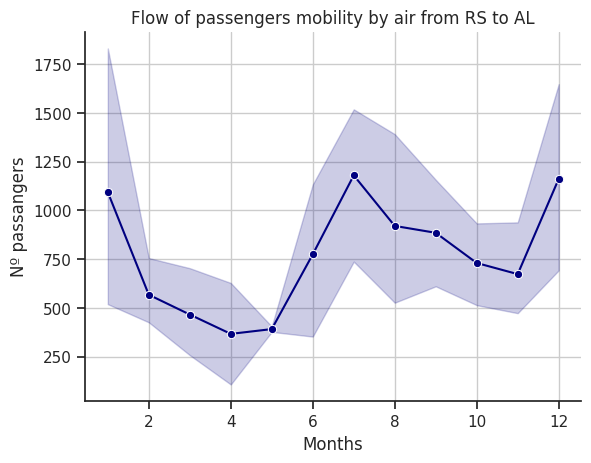

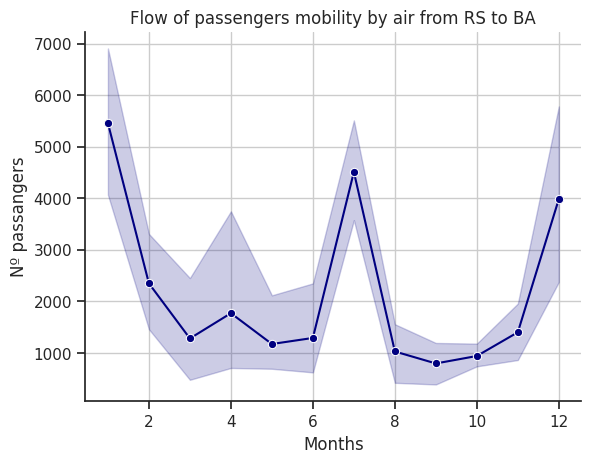

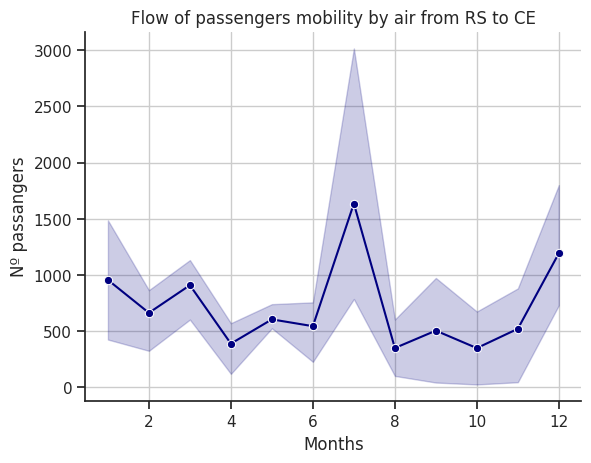

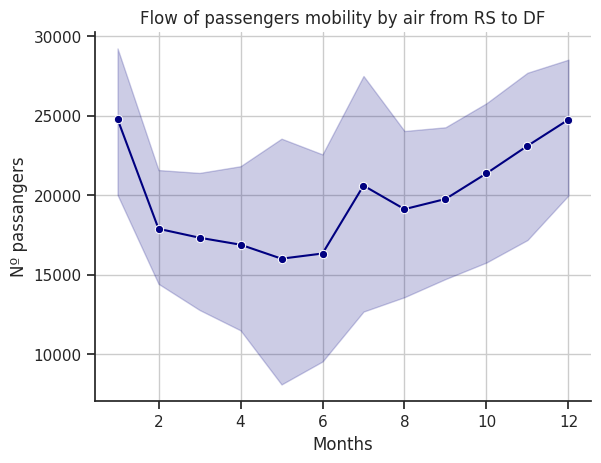

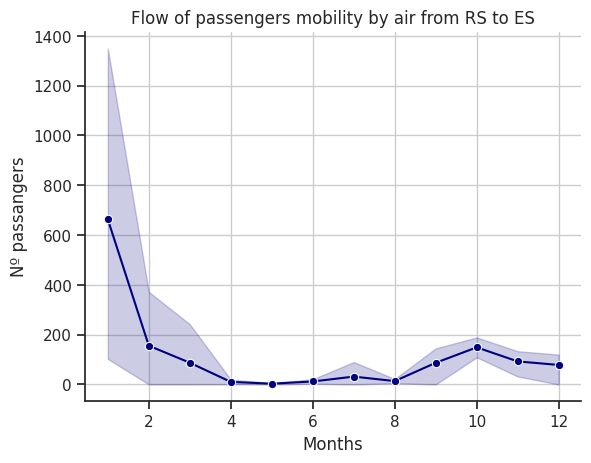

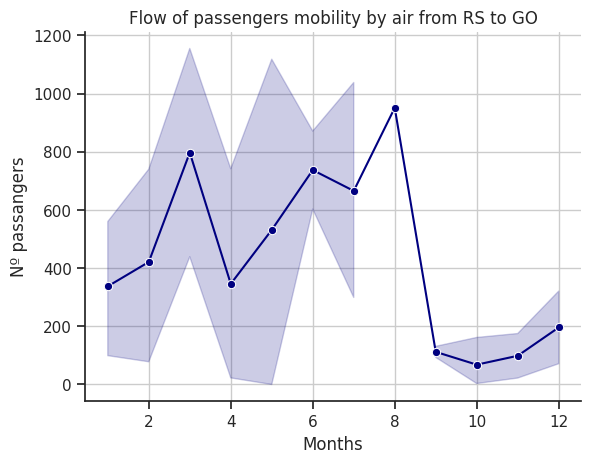

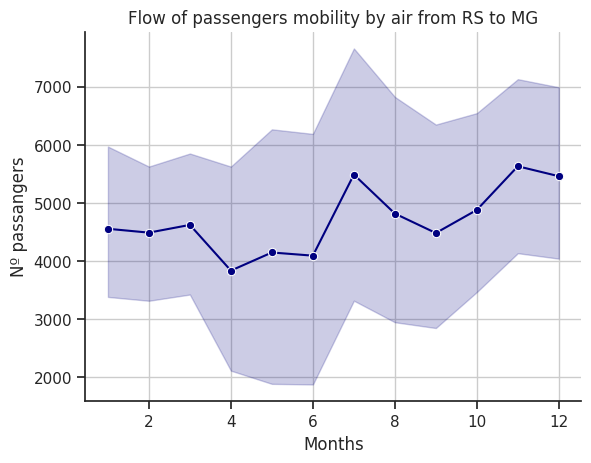

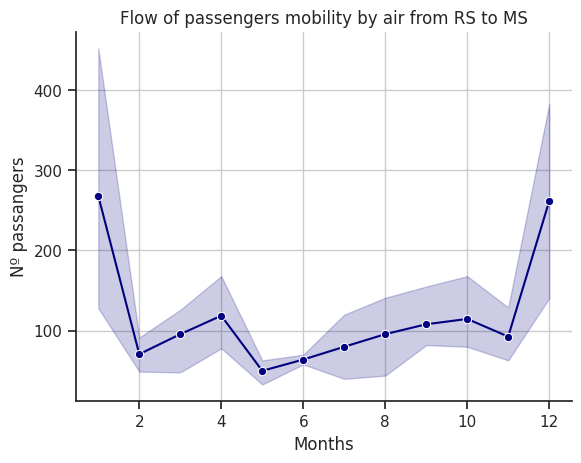

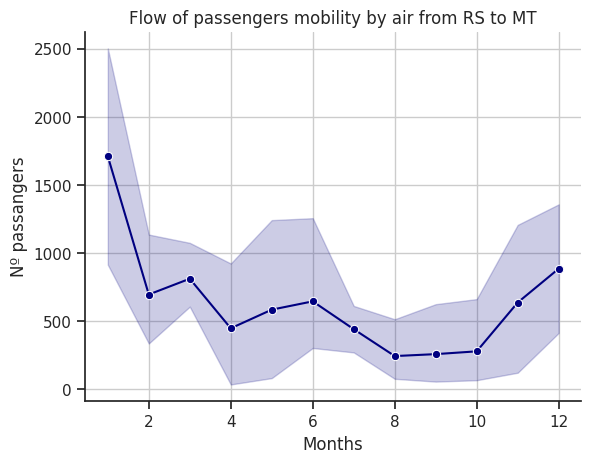

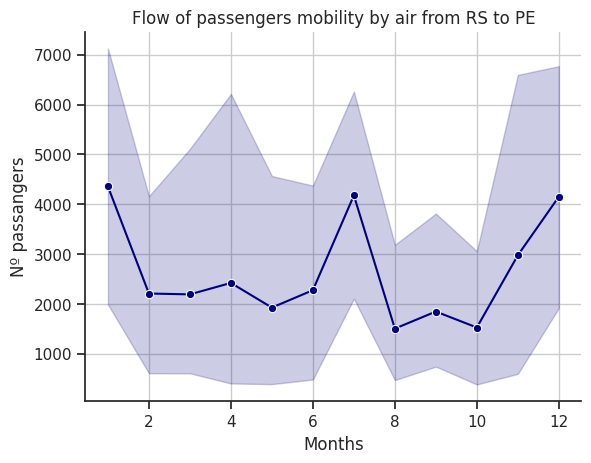

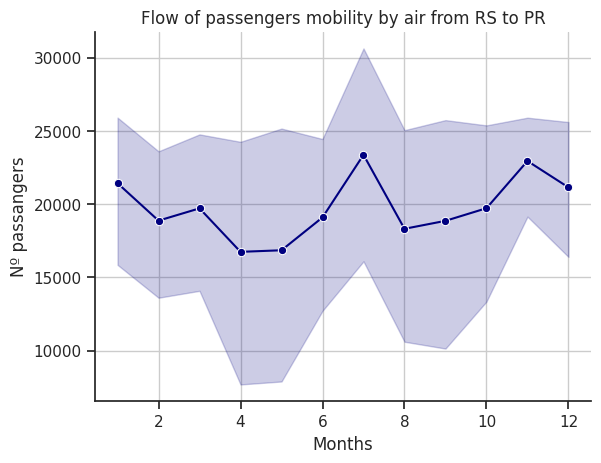

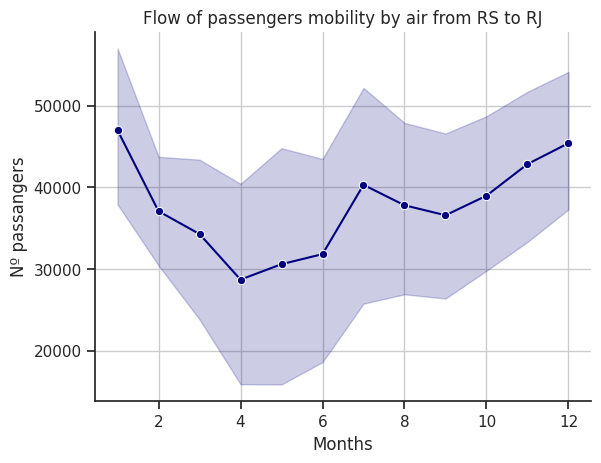

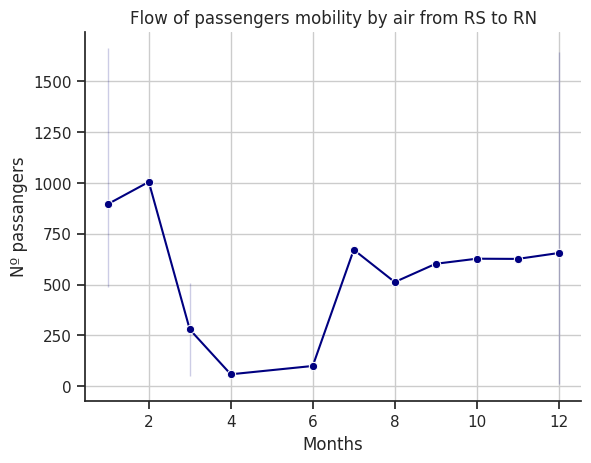

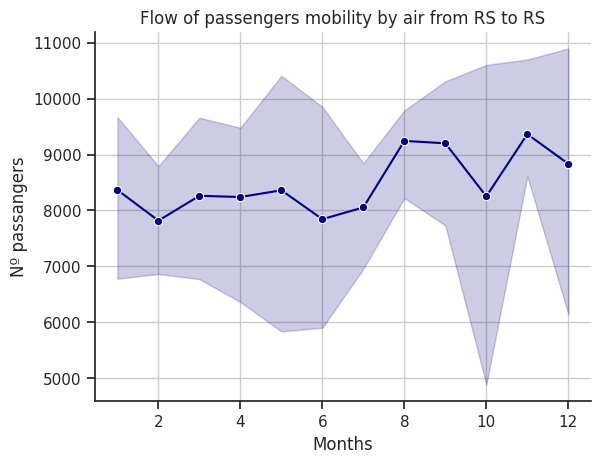

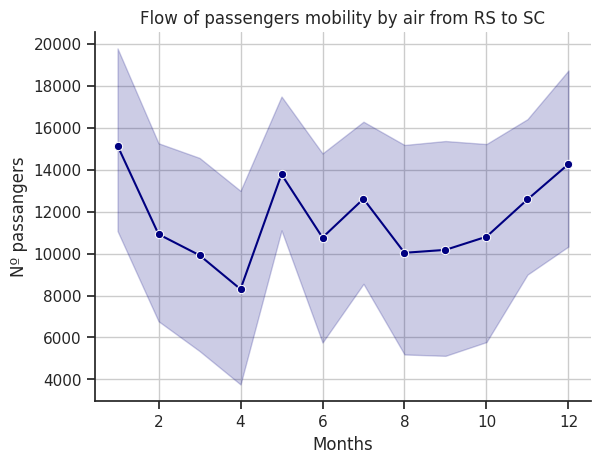

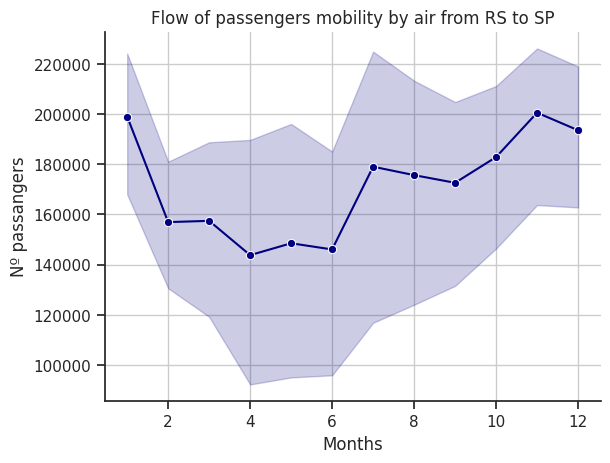

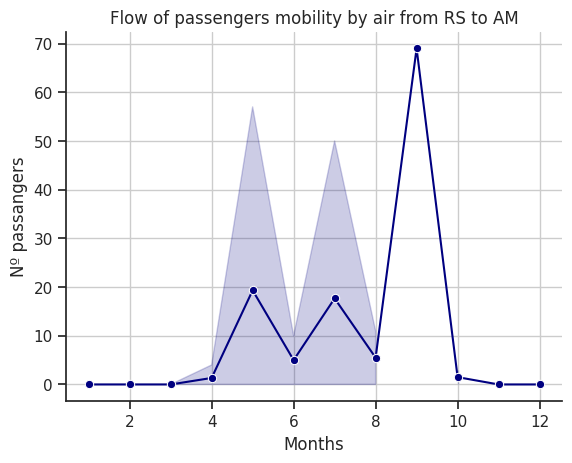

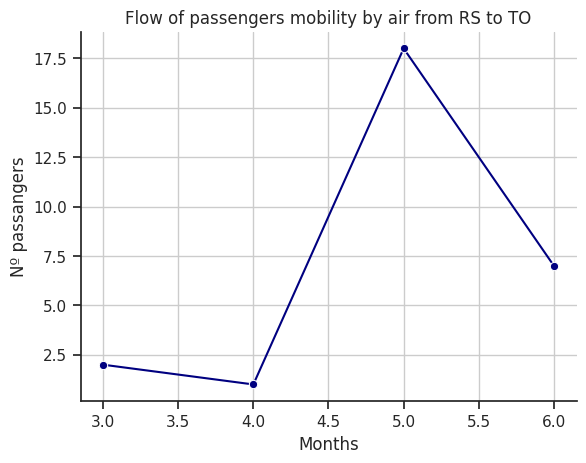

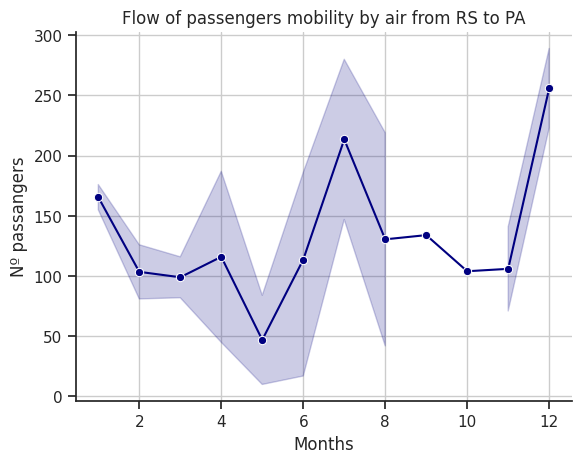

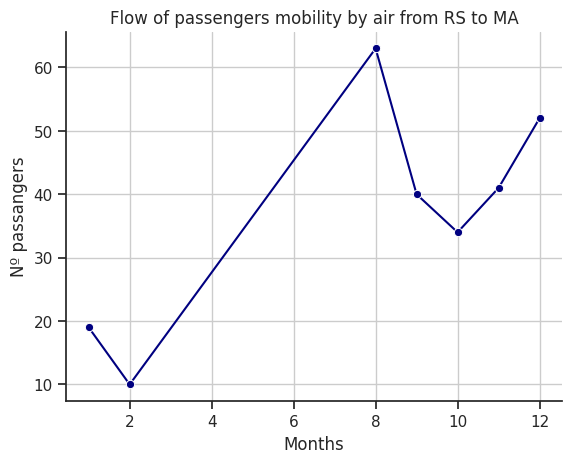

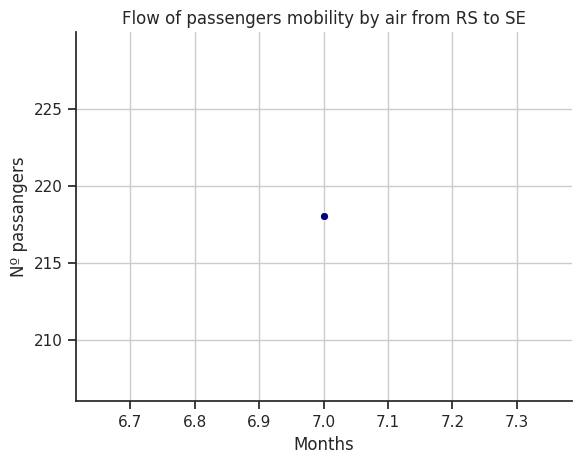

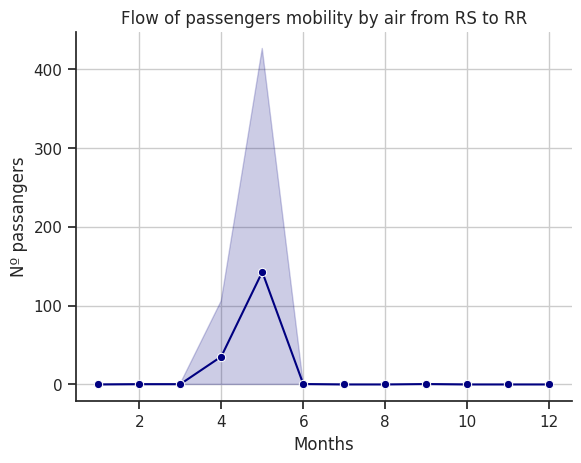

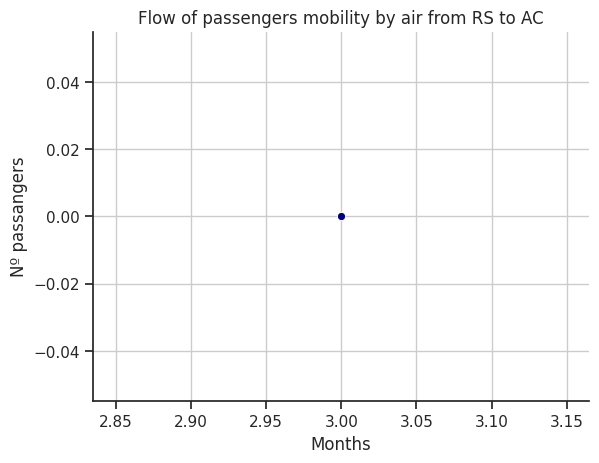

In [109]:
sel_uf = 'RS'
selec_uf = spatial_ses[spatial_ses.uf_ori == sel_uf]

for uf in selec_uf.uf_des.unique():

    uf1 = sel_uf
    uf2 = uf
 
    #Set the style and font sizes
    sns.set_style('ticks')
    plt.rcParams.update({'font.size': 8})

    dta_plot = selec_uf[selec_uf.uf_des == uf]


    # Create a Seaborn line plot with different markers for each product
    sns.lineplot(x='mes', y='aero_pass', data=dta_plot, marker='o', color='navy')
    #sns.lineplot(x='Months', y='Product B', data=df, marker='s', color='teal', label='Product B')
    #sns.lineplot(x='Months', y='Product C', data=df, marker='D', color='salmon', label='Product C')
 
    # Set plot title and axes labels
    plt.title('Flow of passengers mobility by air from {}'.format(uf1) + ' to {}'.format(uf2))
    plt.xlabel('Months')
    plt.ylabel('Nº passangers')
 
    # Add a legend
    #plt.legend(loc='lower right')
 
    # Add a grid
    plt.grid(True)
 
    # Remove the top and right spines
    sns.despine()
 
    # Show the plot
    plt.show()

In [84]:
spatial_ses[(spatial_ses.uf_ori == 'AC') & (spatial_ses.uf_des == 'AC') & ((spatial_ses.ano == '2017'))]

ano  mes uf_ori uf_des  aero_pass
0     2017    1     AC     AC       4332
362   2017    2     AC     AC       4017
688   2017    3     AC     AC       4102
1025  2017    4     AC     AC       3962
1367  2017    5     AC     AC       4103
1715  2017    6     AC     AC       4048
2054  2017    7     AC     AC       4748
2403  2017    8     AC     AC       4021
2734  2017    9     AC     AC       3430
3065  2017   10     AC     AC       3672
3411  2017   11     AC     AC       3672
3754  2017   12     AC     AC       3907

In [87]:
spatial_ses[(spatial_ses.uf_ori == 'AC') & (spatial_ses.uf_des == 'AM') & ((spatial_ses.ano == '2017'))]

ano  mes uf_ori uf_des  aero_pass
1     2017    1     AC     AM       1065
363   2017    2     AC     AM        901
689   2017    3     AC     AM       1133
1026  2017    4     AC     AM       1019
1368  2017    5     AC     AM       1195
1716  2017    6     AC     AM        906
2055  2017    7     AC     AM       1725
2404  2017    8     AC     AM       1244
2735  2017    9     AC     AM        947
3066  2017   10     AC     AM        857
3412  2017   11     AC     AM       1132
3755  2017   12     AC     AM        934

In [86]:
spatial_ses

ano  mes uf_ori uf_des  aero_pass
0      2017    1     AC     AC       4332
1      2017    1     AC     AM       1065
2      2017    1     AC     DF      12961
3      2017    1     AC     RO       4194
4      2017    1     AC     SP          0
...     ...  ...    ...    ...        ...
24529  2023    4     TO     MG       1929
24530  2023    4     TO     MT          0
24531  2023    4     TO     PA          0
24532  2023    4     TO     PI          0
24533  2023    4     TO     SP      14506

[24534 rows x 5 columns]